<a href="https://colab.research.google.com/github/Sanddeep-K/Capstone_1_EDA_Play_Store_App_Review/blob/main/Sandeep_K_Capstone_1_EDA_Play_Store_App_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : EDA of Play Store App Reviews**

-----
-----

## <b> Problem Description </b>

The Play Store apps data has enormous potential to drive app-making businesses to success.

New app maker company want to build a successful Mobile App, which should be accepted by huge customer base of Play Store and creatre a positive Brand Image among customers.

This company has given this assignment to me and asked me to have a detailed EDA of given Play Store Data and submit a report to the Management with my Recommendations on below,

1. Most Successful Genres, Categories & Apps on the Play Store
2. Customer Segment wise most preferred App Categories
3. Most reviewed and positively endorsed Genres / Categories & Apps
4. Important factors leads to the success of Mobile App
5. Technology, Specifications & Support requirements
6. Things to be avoided by App Makers
7. Actionable insights for the developers to work on and capture the Android market.

# **Let's Start**

-----
-----

### First of all, let's mount the drive and import libraries those are required throughout the course of our analysis.
-----

In [ ]:
# Let's mount Google Drive first i.e. depository of datasets

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Let's import required libraries to process data analysis and visualization
-------

In [ ]:
import pandas as pd                                                             # For data processing
import numpy as np                                                              # For arithmatic calculations
from matplotlib import pyplot as plt                                            # Works as a visualization tool
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns                                                           # For making graphical representation with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly                                                                   # Works as a visualization tool
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go                                                  # Works as a visualization tool

import plotly.express as px                                                     # For graphical representation

import plotly.io as iplot
iplot.renderers.default = 'colab'                                               # For visualization google colab

import warnings
warnings.filterwarnings('ignore')                                               # To ignore warnings

## **Importing Datasets**

-----
-----

In [ ]:
# Importing the file path and datasets for analysis.

data_path = ('/content/drive/MyDrive/Colab Notebooks/Capstone_Project_1/Play_Store_App_Data/Play Store Data.csv')
reviews_path = ('/content/drive/MyDrive/Colab Notebooks/Capstone_Project_1/Play_Store_App_Data/User Reviews.csv')

psa_data_df = pd.read_csv(data_path)                                            # Dataset 1 - Play Store Data
reviews_df = pd.read_csv(reviews_path)                                          # Dataset 2 - App Reviews Data

## **Exploring Dataset - 1**

----------
-----

### Play Store App Data
-----

In [ ]:
## Let's have a glance over the number of rows and columns in our dataset

shape = psa_data_df.shape
print("The data set contains {} Records.\nNumber of features are: {}. ".format(shape[0],(shape[1])))

The data set contains 10841 Records.
Number of features are: 13. 


In [ ]:
# Let's have a glance on first five rows of our dataset
psa_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
## Let's have a glance at last five rows of our dataset
psa_data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Columns Description : Play Store App Data.
-----

1.  **App :** This column consist of the names of the Mobile Apps.
2.   **Category :** This column consist of the category of the Mobile Apps.
3.   **Rating :** This column consist of the user ratings of the Mobile Apps.
4.   **Reviews :** This column consist of the user reviews of the Mobile Apps.
5.   **Size :** This column consist of the size of the Mobile Apps in KB / MB.
6.   **Install :** This column consist of the number of installations of the Mobile Apps.
7.   **Type :** This column consist of the subscription type (free/paid)of the Mobile Apps.
8.   **Price :** This column consist of the subscription cost of the Mobile Apps.
9.   **Content Rating:** This column consist of the user group category of the Mobile Apps.
10.  **Genres:** This column consist of the Genre type name of the Mobile Apps.
11.  **Last Updated:** This column consist of the Last date of mobile app update performed for the Mobile App.
12.  **Current Ver:** This column consist of the name of the current version of the Mobile App.
13.  **Android Ver:** This column consist of the name of the android version for the Mobile App.

## **Data Cleaning** - Play Store App Data

----------
-----

### Checking Missing values - Play Store App Data
-----

In [ ]:
# Let's check : Critical Information of the dataset in summary format

print(f'The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).')
print('\n')
def psa_df():
  temp = pd.DataFrame(index =psa_data_df.columns)
  temp['Data_Type'] = psa_data_df.dtypes
  temp['Unique_Count'] = psa_data_df.nunique()
  temp['Count']= psa_data_df.isnull().count()
  temp['Missing_Count'] = psa_data_df.isnull().sum()
  temp['Missing_percentage']= round( temp['Missing_Count'] / temp['Count'] * 100, 2) 
  return temp
psa_df()

The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).




,Data_Type,Unique_Count,Count,Missing_Count,Missing_percentage
App,object,9660,10841,0,0.00
Category,object,34,10841,0,0.00
Rating,float64,40,10841,1474,13.60
Reviews,object,6002,10841,0,0.00
Size,object,462,10841,0,0.00
Installs,object,22,10841,0,0.00
Type,object,3,10841,1,0.01
Price,object,93,10841,0,0.00
Content Rating,object,6,10841,1,0.01
Genres,object,120,10841,0,0.00


### Checking Duplicate values - Play Store App Data
-----

In [ ]:
# Let's check : Duplicated rows by taking only unique app and its last entry.

psa_data_df[psa_data_df.duplicated(subset='App', keep='last')]                  #Keeping last record

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3825,Transit: Real-Time Transit App,MAPS_AND_NAVIGATION,4.2,43269,Varies with device,"5,000,000+",Free,0,Everyone,Maps & Navigation,"July 18, 2018",4.4.7,Varies with device
3826,Mapy.cz - Cycling & Hiking offline maps,MAPS_AND_NAVIGATION,4.5,56443,43M,"1,000,000+",Free,0,Everyone,Maps & Navigation,"June 26, 2018",6.2.0,4.1 and up
3827,Uber,MAPS_AND_NAVIGATION,4.2,4928420,Varies with device,"100,000,000+",Free,0,Everyone,Maps & Navigation,"August 6, 2018",Varies with device,Varies with device
3865,Moovit: Bus Time & Train Time Live Info,MAPS_AND_NAVIGATION,4.4,617477,Varies with device,"10,000,000+",Free,0,Everyone,Maps & Navigation,"August 5, 2018",Varies with device,Varies with device


In [ ]:
# As per above table, there are 1181 duplicate records in the given dataset.

### **From the above review on dataset, I have got some observations as below:**

-----
1. Also found 1181 duplicate records in the dataset.
2. Rating has total 1474 null values which contributes 13.60% of the ratings data.
2. Columns names are having white spaces, which may create hurdles during Data Wrangling process
2. Type has 1 null value which contributes 0.01% of the total records.
3. Content_Rating has 1 null value which contributes 0.01% of the total records.
4. Current_Ver has 8 null values which contributes 0.07% of the total records.
5. Android_Ver has 3 null values which contributes 0.03% of the total records.
6. Rating column has more than 10% missing values.
8. Found some data impurities as well, like '+' sign in "Installs" Column, 'M / K' in Size column.

### **Handling Missing Values : Play_Store_Dataset**

-----
1. Creating a copy of original dataset to avoid disturbance in original dataset
2. Finding and replacing missing values appropriately (with Mean / Median)
3. Removing dupications to have correct data for analysis
4. Correcting Column Names for effective data wrangling and analysis

In [ ]:
# Creating a copy of  Play Store App dataset and having a broad overview of the Dataset.

ps_data_df = psa_data_df.copy()
ps_data_df.shape                                                                # to confirm copy of the exact dataset

(10841, 13)

1. Let's handle **1181** duplicate records of App Column

-----

In [ ]:
# Dropped duplicated apps from dataframe and keeping only last record.

ps_data_df = ps_data_df.drop_duplicates(subset='App', keep = 'last')

In [ ]:
# Let's check New shape of Play Store App data

rows = ps_data_df.shape[0]
columns = ps_data_df.shape[1]
print(f'The number of rows in Play Store dataframe after removing duplicate App names are {rows}.') 
print(f'The number of columns in Play Store dataframe after keeping only required columns for EDA are {columns}.')

The number of rows in Play Store dataframe after removing duplicate App names are 9660.
The number of columns in Play Store dataframe after keeping only required columns for EDA are 13.


2. Let's replace spaces in **'Column'** names with **'Underscore'** 

-----

In [ ]:
ps_data_df.columns = ps_data_df.columns.str.replace(' ', '_')                   # It helps in coding while processing and analysing data

3. Handling total **1474** null values of column **'Rating'** **bold text**

-----


As 'Rating' is an important data to work-out further analysis, we can check central tendancy of the rating data and update these null values.

In [ ]:
# Let's have a glance on central tendancy of 'Rating' column with help of 'Box Plot', it will help us to quickly identify,

# 1. Median value
# 2. Dispersion  of dataset (it helps us to understand Range, interquartile range, and standard deviation of data)
# 3. Skewness of dataset (it gives us the direction of the outlier)

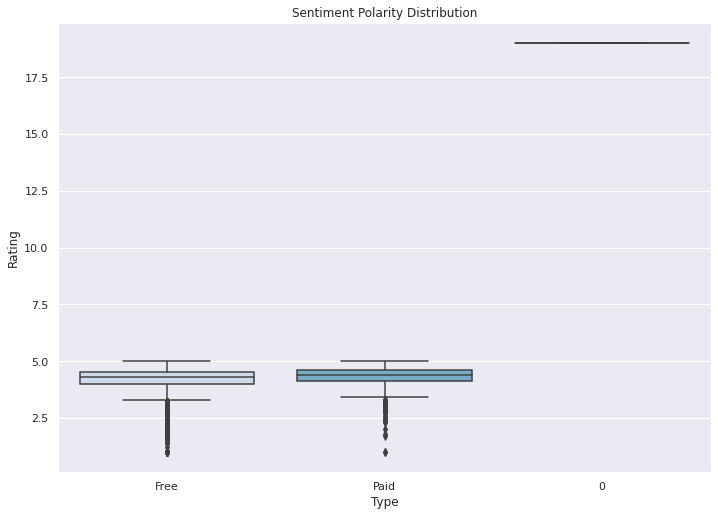

In [ ]:
# Plotting "Box Plot"

sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Rating', data=ps_data_df, palette='Blues')
title = ax.set_title('Sentiment Polarity Distribution')

In box plot we can see there a record with 'null' Type and having outlier rating value i.e. above 17.5.

This valuse must not be a rating, as per above box plot Min Rating is 1 and Max range of Rating is 5.

Let's check unique values of Rating and identify this outlier value and their count.

**Step 1** - Handling **Outlier Values** in Rating Column

-----

In [ ]:
ps_data_df.Rating.unique()    # to find unique rating values

array([ 4.1,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,  4.8,
        3.9,  4.9,  3.6,  3.7,  nan,  3.3,  3.4,  3.5,  3.1,  5. ,  2.5,
        3. ,  1. ,  1.9,  2.7,  2.8,  2.9,  2.6,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
# There is only one outlier value 19 in the Rating data.

# Let's check that record for more clarity

ps_data_df[ps_data_df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# This record looks like a Data Entry mistake, as per the details, here 'CATEGORY' entry has been missed 
# and hence all other entries also got shifted to one column ahead

# let's delete this wrong category entry, shift other row entries and replace missing entry with appropriate category type

# Deleting entry :

from copy import deepcopy
missing_entry = deepcopy(ps_data_df.loc[10472])
missing_entry[1:] = missing_entry[1:].shift(periods=1)
ps_data_df.loc[10472] = missing_entry

# remove the temporary variable

del missing_entry

In [ ]:
# As per App Name, this app can be categorised as "LIFESTYLE" category app

# Updating appropriate actegory for missing entry

ps_data_df.loc[10472, 'Category'] = 'LIFESTYLE'
ps_data_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content_Rating                                   Everyone
Genres                                                NaN
Last_Updated                            February 11, 2018
Current_Ver                                        1.0.19
Android_Ver                                    4.0 and up
Name: 10472, dtype: object

**Step 2** - Handling **1474** **null** values of Rating Column

-----

In [ ]:
# As per 'Box Plot' median value of the data is lying between 4 - 5, lets check the same update missing values accordingly.

In [ ]:
# Checking median rating of rating column.
rating_median = ps_data_df['Rating'].median()
print(f'The median of of Rating column is {rating_median}.')

The median of of Rating column is 4.3.


In [ ]:
# Filled NaN values in rating column.
ps_data_df.loc[ps_data_df['Rating'].isnull(), 'Rating'] = ps_data_df['Rating'].fillna(rating_median)

4. Handling **1 null** value of **Type** Column
-----

In [ ]:
# Type
ps_data_df[ps_data_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# In family category only Command & Conquer: Rivals app has NaN in its Type column.
df_groupby_category = ps_data_df.groupby('Category')

In [ ]:
# The number of Free and Paid apps in Family category.
df_family = df_groupby_category.get_group('FAMILY')
df_family['Type'].value_counts()

Free    1720
Paid     185
Name: Type, dtype: int64

In [ ]:
# NaN value in Type column filled with as Most number of apps are Free, also price is "0" hence it's evident that this App must be free.
ps_data_df['Type'] = ps_data_df['Type'].fillna('Free')

In [ ]:
# Type
ps_data_df[ps_data_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


5. Handling **8 Null** Values of **"Current Version"** Column
-----

In [ ]:
ps_data_df['Current_Ver'].isnull().value_counts()

False    9652
True        8
Name: Current_Ver, dtype: int64

In [ ]:
ps_data_df['Current_Ver']

0                     1.0.0
2                     1.2.4
3        Varies with device
4                       1.1
5                       1.0
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: Current_Ver, Length: 9660, dtype: object

In [ ]:
# There are 8 NaN values and in some apps 'Current_Ver' is "Varies with device"

In [ ]:
# Lets check count of "Varies with Device"

ps_data_df["Current_Ver"].value_counts()

Varies with device    1054
1.0                    797
1.1                    260
1.2                    176
2.0                    149
                      ... 
8.3                      1
5.2.5                    1
8.2.9                    1
2.71                     1
2.0.148.0                1
Name: Current_Ver, Length: 2818, dtype: int64

In [ ]:
# Lets check count of "Varies with Device"

ps_data_df["Current_Ver"].mode()

0    Varies with device
dtype: object

In [ ]:
# As per data mode of the Current Version is "Varies with device", so lets keep this Version as it is.

In [ ]:
ps_data_df[ps_data_df.Current_Ver.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# Finding corresponding Median "Current Versions" basis given "Android Versions" for above 8 Records

# Current_Ver Median for Android_Ver = '4.2 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '4.2 and up']
app_current_ver_df['Current_Ver'].mode()

0    1.0
dtype: object

In [ ]:
# Current_Ver Median for Android_Ver = '1.5 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '1.5 and up']
app_current_ver_df['Current_Ver'].mode()

0    1.0
dtype: object

In [ ]:
# Current_Ver Median for Android_Ver = '4.0 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '4.0 and up']
app_current_ver_df['Current_Ver'].mode()

0    1.0
dtype: object

In [ ]:
# Current_Ver Median for Android_Ver = '1.6 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '1.6 and up']
app_current_ver_df['Current_Ver'].mode()

0    2.3.2
dtype: object

In [ ]:
# Current_Ver Median for Android_Ver = '2.3 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '2.3 and up']
app_current_ver_df['Current_Ver'].mode()

0    1.0
dtype: object

In [ ]:
# Current_Ver Median for Android_Ver = '2.0 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '2.0 and up']
app_current_ver_df['Current_Ver'].mode()

# As per earlier Box Plot check, its evident that data is negatively skewed (median is not closer to bottom), hence it's better to consider lower value as median form below result.
# Hence, here median value will be 1.0

0      1.0
1    2.4.4
dtype: object

In [ ]:
# Current_Ver Median for Android_Ver = '3.0 and up'
app_current_ver_df = ps_data_df[ps_data_df['Android_Ver'] == '3.0 and up']
app_current_ver_df['Current_Ver'].mode()

0    1.0
dtype: object

In [ ]:
# Updating 8 Null values of Current_Ver with corresponding Median derived as above,

ps_data_df.loc[15,'Current_Ver'] = '1.0'         # '4.2 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[1553,'Current_Ver'] = '1.0'       # '1.5 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[6322,'Current_Ver'] = '1.0'       # '4.0 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[6803,'Current_Ver'] = '2.3.2'     # '1.6 and up' - Android version corresponding Current Ver mode is "2.3.2"
ps_data_df.loc[7333,'Current_Ver'] = '1.0'       # '4.0 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[7407,'Current_Ver'] = '1.0'       # '2.3 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[7730,'Current_Ver'] = '1.0'       # '2.0 and up' - Android version corresponding Current Ver mode is "1.0"
ps_data_df.loc[10342,'Current_Ver'] = '1.0'      # '3.0 and up' - Android version corresponding Current Ver mode is "1.0"

6. Handling **2 Null** values of **"Android_Ver"** column

In [ ]:
ps_data_df['Android_Ver'].isnull().value_counts()

False    9658
True        2
Name: Android_Ver, dtype: int64

In [ ]:
ps_data_df[ps_data_df.Android_Ver.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [ ]:
# Finding corresponding Median "Android Versions" basis given "Current Versions" for above 2 Records

# Android_Ver Median for Current_Ver = '4.4'

app_android_ver_df = ps_data_df[ps_data_df['Current_Ver'] == '4.4']
app_android_ver_df['Android_Ver'].mode()

0    4.0.3 and up
dtype: object

In [ ]:
# Android_Ver Median for Current_Ver = '1.1'

app_android_ver_df = ps_data_df[ps_data_df['Current_Ver'] == '1.1']
app_android_ver_df['Android_Ver'].mode()

0    4.1 and up
dtype: object

In [ ]:
# Replacing NaN values with mode of corresponding mode value of Android_Ver
# For Current Version = 4.4 corresponding Mode of Android Version is "4.0.3 and up"
# For Current Version = 1.1 corresponding Mode of Android Version is "4.1 and up"

ps_data_df.loc[4453,'Android_Ver'] = '4.0.3 and up'
ps_data_df.loc[4490,'Android_Ver'] = '4.1 and up'

## **Exploring Dataset - 2**
-----
-----

## User Reviews Data
-----

In [ ]:
## Let's have a glance over the number of rows and columns in our dataset
shape = reviews_df.shape
print("The data set contains {} Records.\nNumber of features are: {}. ".format(shape[0],(shape[1])))

The data set contains 64295 Records.
Number of features are: 5. 


In [ ]:
# Let's have a glance on first five rows of our dataset
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
## Let's have a glance at last five rows of our dataset
reviews_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## Columns Description : Reviews Data.

1.  **App :** This column consist of the names of the Mobile Apps.
2. **Translated_Review :** This column consist of the system transltaed user reviews of the Mobile Apps.
3. **Sentiment :** This column consist of the sentiment type (Positive / Negative / Neutral) of the user review for Mobile App.
4. **Sentiment Polarity:** This column consist of the category of Sentiment Polarity for the user review.Sentiment polarity defines the orientation of the expressed sentiment. It defines the extent of the sentiment of the text in numrical data.
5. **Sentiment Subjectivity :** This column consist of a measure of the intensity of the sentiment one expressed through their text. It refers to the text that contains text which is usually expressed by a human having typical moods, emotions, and feelings.

In [ ]:
# Summary of Critical Information for the dataset.

print(f'The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).')
print('\n')
def ur_df():
  temp = pd.DataFrame(index = reviews_df.columns)
  temp['Data_type'] = reviews_df.dtypes
  temp['Unique_count'] = reviews_df.nunique()
  temp['Count']= reviews_df.isnull().count()
  temp['Missing_values_count'] = reviews_df.isnull().sum()
  temp['Missing_percentage']= round( temp['Missing_values_count'] / temp['Count'] * 100, 2) 
  return temp
ur_df()

# This can also be obtained by - df.info()

The below dataframe gives us feature wise data type, unique values, total count, missing count(NaN).




,Data_type,Unique_count,Count,Missing_values_count,Missing_percentage
App,object,1074,64295,0,0.00
Translated_Review,object,27994,64295,26868,41.79
Sentiment,object,3,64295,26863,41.78
Sentiment_Polarity,float64,5410,64295,26863,41.78
Sentiment_Subjectivity,float64,4474,64295,26863,41.78


### **From the above review on dataset, I have got some observations as below:**

1. Translated_Review column has total 26868 null values which contributes 41.79% of the column data.
2. Sentiment column has total 26863 null values which contributes 41.78% of the total records.
3. Sentiment_Polarity column has total 26863 null values which contributes 41.78% of the total records.
4. Sentiment_Subjectivity column also has total 26863 null values which contributes 41.78% of the total records.
5. No discrepancies found in App Column data.

### **Handling Missing Values : Reviews_Dataset**

In [ ]:
# Created a copy of User Reviews.
reviews_data_copy = reviews_df.copy()

In [ ]:
# As checked above in sabset "review_nan_value_check" all 26868 records having "NaN" value
# These records are unreviewed, hence to optimise master review data, dropping these unreviewed records

# Count of Null Values from each columns.
reviews_data_copy.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# Drooping Na rows having all NaN values in rows.
reviews_data_copy = reviews_data_copy.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], how='all')

In [ ]:
# Checking if any NaN values in dataframe.
reviews_data_copy.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
# Dropped NaN from Translated column and created a clean User Reviews data.
reviews_data_copy = reviews_data_copy.dropna(subset= ["Translated_Review"], how = "all")

In [ ]:
# Checking if any NaN values in dataframe.
reviews_data_copy.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
# Shape of dataframe after dropping NaN values.
reviews_data_copy.shape

(37427, 5)

In [ ]:
count_unique_apps = reviews_data_copy['App'].nunique()
print(f'The count of Unique Apps in cleaned user reviews dataset {count_unique_apps}.')

The count of Unique Apps in cleaned user reviews dataset 865.


In [ ]:
# Having a final check for data cleaning (unique/null/datatypes)

print('Shape of Revies_Data is :', reviews_data_copy.shape)

def reviews_info1():
  temp_ps = pd.DataFrame(index=reviews_data_copy.columns)
  temp_ps['DataType'] = reviews_data_copy.dtypes
  temp_ps['Non-Null_Values'] = reviews_data_copy.count()
  temp_ps['Unique_Values'] = reviews_data_copy.nunique()
  temp_ps['NaN_Values'] = reviews_data_copy.isnull().sum()
  temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(reviews_data_copy))*100
  return temp_ps
reviews_info1()

Shape of Revies_Data is : (37427, 5)


,DataType,Non-Null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
App,object,37427,865,0,0.0
Translated_Review,object,37427,27994,0,0.0
Sentiment,object,37427,3,0,0.0
Sentiment_Polarity,float64,37427,5410,0,0.0
Sentiment_Subjectivity,float64,37427,4474,0,0.0


**So, now we can see, Reviews Dataset is ready to process**
1. No Null Values
2. Correct Datatypes
3. Same no of records in all columns

-----

# **Creating Merged DataFrame** - For Sentiment Analysis

-----

## **Data Wrangling - Play Store Dataset**
-----

1. Checking and correcting column datatypes
2. Merging Play Store & Reviews Data for effective Analysis of Data
3. Removing special characters from values.

In [ ]:
# Null values from each column.
ps_data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            1
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [ ]:
# Found 1 null value in Genre Column. Let's check all the columns for discrepancy check and during course, let's correct Genre Null Value as well.

In [ ]:
# Checking unique values in Category Column.
ps_data_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Found "Category" Column datatype correct.

No other discrepancy found in "Category" Column

In [ ]:
# Checking unique values in Rating Column.
ps_data_df['Rating'].unique()

array([4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, 4.8, 3.9, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.5, 3.0, 1.0, 1.9, 2.7, 2.8,
       2.9, 2.6, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2,
       '1.9'], dtype=object)

In [ ]:
# Datatype is wrong in Rating column
# All values are of "float" datatype, lets change datatype of ratings as 'float' datatype

ps_data_df['Rating'] = ps_data_df['Rating'].astype('float')
ps_data_df['Rating'].dtype

dtype('float64')

In [ ]:
# let's check data in the Reviews column

ps_data_df['Reviews'].describe()

count     9660
unique    5333
top          0
freq       593
Name: Reviews, dtype: object

In [ ]:
# No of Reviews must be 'integer' hence converting "Reviews" dtype from 'float' to 'int' for better numerical analysis
ps_data_df["Reviews"] = pd.to_numeric(ps_data_df["Reviews"])

In [ ]:
# Let's check Size column data.
ps_data_df['Size'].unique()                                                     #Unique values in Size

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '46M', '51M', '48M', '8.5M', '41M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '8.4M', '118k', '44M', '695k', '1.6M', '18k', '53M',
     

In [ ]:
# Let's remove these different units M & K and convert all to a single unit KB as follow,

# To convert 'M' (which denotes size in MB) unit values in KB, lets remove 'M' and multiply the Size number with 1024 (i.e. 1 MB = 1024 KB)

ps_data_df['Size'] = ps_data_df['Size'].map(
    lambda value:
      str(int(float(value.rstrip('M'))*1024)) if value[-1] == 'M'
      else value)

In [ ]:
# Removing 'k' unit

ps_data_df['Size'] = ps_data_df['Size'].map(
    lambda value:
      str(int(float(value.rstrip('k')))) if value[-1] == 'k'
      else value)

In [ ]:
# Also there is one more size type, which needs to be changed 
# Let's update 'Vaaries with device' with 'NaN'

ps_data_df['Size'] = ps_data_df['Size'].map(
    lambda value:
      np.nan if value == 'Varies with device'
      else value)

In [ ]:
# Let's check unique values to confirm desired corrections in column 'Size

ps_data_df['Size'].unique()

array(['19456', '8908', '25600', '2867', '5734', '29696', '33792', '3174',
       '28672', '12288', '20480', '21504', '37888', '2764', '5632',
       '17408', '39936', '31744', '14336', '4300', '23552', '6144',
       '6246', '4710', '9420', '5324', '11264', nan, '9625', '15360',
       '10240', '1228', '24576', '26624', '8192', '8089', '57344',
       '58368', '35840', '55296', '201', '3686', '5836', '8806', '2457',
       '27648', '2560', '7168', '16384', '3481', '9113', '3993', '2969',
       '38912', '32768', '5529', '18432', '1126', '2252', '4608', '10035',
       '53248', '9216', '6860', '30720', '2662', '7270', '3788', '22528',
       '7577', '6553', '3276', '8396', '10137', '5017', '9728', '5120',
       '6041', '13312', '74752', '6963', '3584', '4096', '2355', '7372',
       '2150', '43008', '7475', '9318', '56320', '23', '6656', '1536',
       '7680', '47104', '52224', '49152', '8704', '41984', '8499', '4403',
       '4812', '3379', '40960', '7987', '9011', '6758', '5222', '6

In [ ]:
ps_data_df['Size'].isnull().value_counts()

False    8433
True     1227
Name: Size, dtype: int64

In [ ]:
ps_data_df['Size'].median()

12288.0

In [ ]:
# lets update this median value of size for all "NaN" values

ps_data_df['Size'] = ps_data_df['Size'].fillna(12288)

In [ ]:
ps_data_df['Size'].isnull().value_counts()

False    9660
Name: Size, dtype: int64

In [ ]:
# As per above unique values, 'Size' column values are 'integer' data type

# Let's convert data type of the 'Size' column to 'integer'

ps_data_df['Size'] = ps_data_df['Size'].astype('int')

ps_data_df['Size'].dtype

dtype('int64')

In [ ]:
# Let's check Category column data
catergory_unique_count = ps_data_df['Category'].nunique()
print(f'The total unique categories are {catergory_unique_count}.')

The total unique categories are 33.


In [ ]:
# Category Column unique value count.
ps_data_df['Category'].value_counts()

FAMILY                 1906
GAME                    926
TOOLS                   829
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               370
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
ENTERTAINMENT            79
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [ ]:
# App column unique count of Apps.
app_unique_count = ps_data_df['App'].nunique()
print(f'Total unique app names in App column {app_unique_count}.')

Total unique app names in App column 9660.


In [ ]:
# Installs column unique entries.
ps_data_df['Installs'].unique()

array(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '500,000+',
       '1,000,000,000+', '100,000,000+', '1,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '500,000,000+', '0+', '0'], dtype=object)

In [ ]:
# Convert Installs to numeric and remove special characters.
ps_data_df['Installs'] = ps_data_df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
ps_data_df['Installs'] = ps_data_df['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
ps_data_df['Installs'] = ps_data_df['Installs'].apply(lambda x : float(x))

In [ ]:
# Let's check Installs column data and stat
ps_data_df['Installs'].describe()

count    9.660000e+03
mean     7.793441e+06
std      5.376719e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
# Found datatype correct in "Installs" column
# No other discrepancies found in the "Install" data

In [ ]:
# Now, we have only two unique types in Type column.
ps_data_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# Checking unique values in Price.
ps_data_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$1.49', '$2.99', '$7.99', '$3.49', '$1.99',
       '$5.99', '$6.99', '$9.99', '$7.49', '$0.99', '$1.00', '$2.49',
       '$10.99', '$1.50', '$14.99', '$15.99', '$79.99', '$9.00', '$10.00',
       '$16.99', '$11.99', '$29.99', '$74.99', '$5.49', '$33.99',
       '$24.99', '$39.99', '$19.99', '$4.49', '$1.70', '$8.99', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$2.50', '$1.59', '$6.49',
       '$1.29', '$5.00', '$13.99', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85',
       '$46.99', '$109.99', '$3.95', '$154.99', '$3.08', '$2.59', '$4.80',
       '$1.96', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04', '$12.99',
       '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95', '$2.90',
       '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# Converting Price into numerical values and replacing $.
ps_data_df['Price'] = ps_data_df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
ps_data_df['Price'] = ps_data_df['Price'].apply(lambda x : float(x))

In [ ]:
#Price column description #51
ps_data_df['Price'].describe()

count    9660.000000
mean        1.097117
std        16.850750
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [ ]:
# Checking unique Values.
ps_data_df['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
# As per Unique values, there are some "Unrated" values.
# Let's check those values

ps_data_df['Content_Rating'].value_counts()

Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64

In [ ]:
# There are two entries which are 'Unrated', lets check those records

ps_data_df[ps_data_df['Content_Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
7312,Best CG Photography,FAMILY,4.3,1.0,2560,500.0,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186.0,6553,50000.0,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


As per above records both the 'Unrated' apps are related to general use like "Photography" and "Map"

Their Categories are 'FAMILY' & "TOOLS" respectively.

Here we can check mode of the records having "FAMILY" & 'TOOLS'as their categories and accordingly we can update above 2 record.

In [ ]:
# Let's check mode for the record belongs to 'Family' Category (Record No 7312)

temp_cat_data1 = ps_data_df[ps_data_df['Category'] == 'FAMILY']
temp_cat_data1['Content_Rating'].mode()

0    Everyone
dtype: object

In [ ]:
# Let's check mode for the record belongs to 'Tools' Category (Record No 8266)

temp_cat_data1 = ps_data_df[ps_data_df['Category'] == 'TOOLS']
temp_cat_data1['Content_Rating'].mode()

0    Everyone
dtype: object

In [ ]:
# As per above, both the Apps can be considered for 'Everyone' as content rating.
# Let's correct 'Content Rating' records for both the records

ps_data_df.loc[7312,'Content_Rating'] = 'Everyone'
ps_data_df.loc[8266,'Content_Rating'] = 'Everyone'

ps_data_df['Content_Rating'].value_counts()

Everyone           7906
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Name: Content_Rating, dtype: int64

In [ ]:
# Here we checking the unique values in Genres.
ps_data_df['Genres'].isnull().value_counts()

False    9659
True        1
Name: Genres, dtype: int64

In [ ]:
# There is one entry which is null, lets check that record

ps_data_df[ps_data_df.Genres.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19.0,3072,1000.0,Free,0.0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [ ]:
# During brief review of the data, its evident that 'Genre' and 'Category' corresponds to each other
# Here we can check mode of the "Genres" column data for all the records having category mapped as "LIFESTYLE"

temp_cat_data = ps_data_df[ps_data_df['Category'] == 'LIFESTYLE']
temp_cat_data['Genres'].mode()

0    Lifestyle
dtype: object

In [ ]:
# As per above mode check, we can conclude that most of the "Lifestyle" category Apps having "Lifestyle" as Genre.

# hence, lets update 'GENRES' for above 'NaN' record (index no = 10472) as 'Lifestyle'

ps_data_df.loc[10472,'Genres'] = 'Lifestyle'

In [ ]:
# Geners count
geners_df = ps_data_df['Genres'].value_counts().sort_values(ascending=False).reset_index().head(30)
geners_df.rename({'index': 'Genres', 'Genres': 'Total_Count'}, axis=1, inplace=True)

In [ ]:
# As checked eralier, we also found some datatype discrepancies in column 'Last Updated'
# 'Last Update' column is a date hence data type for this column should be 'datetime'
# Let's convert the datatype of this column in 'datetime'

ps_data_df['Last_Updated'] = pd.to_datetime(ps_data_df['Last_Updated'])
ps_data_df['Last_Updated']

0       2018-01-07
2       2018-08-01
3       2018-06-08
4       2018-06-20
5       2017-03-26
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last_Updated, Length: 9660, dtype: datetime64[ns]

In [ ]:
# In order to anlyse date and time realted trends effectively, let's seperate Year / Month / day and keep it in new columns

ps_data_df['LastUpdated_Day'] = ps_data_df['Last_Updated'].dt.day
ps_data_df['LastUpdated_Month'] = ps_data_df['Last_Updated'].dt.month
ps_data_df['LastUpdated_Year'] = ps_data_df['Last_Updated'].dt.year

In [ ]:
# let's check the corrections

ps_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8908,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25600,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2867,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5734,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,26,3,2017


In [ ]:
# A FINAL CHECK FOR PLAY STORE DATA CLEANING
# FIND UNIQUE, NULL COUNT & DATA TYPES

print('Shape of Play_Store_Data is :', ps_data_df.shape)

def playstoreinfo1():
  temp_ps = pd.DataFrame(index=ps_data_df.columns)
  temp_ps['DataType'] = ps_data_df.dtypes
  temp_ps['Non-Null_Values'] = ps_data_df.count()
  temp_ps['Unique_Values'] = ps_data_df.nunique()
  temp_ps['NaN_Values'] = ps_data_df.isnull().sum()
  temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(ps_data_df))*100
  return temp_ps
playstoreinfo1()

Shape of Play_Store_Data is : (9660, 16)


,DataType,Non-Null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
App,object,9660,9660,0,0.0
Category,object,9660,33,0,0.0
Rating,float64,9660,39,0,0.0
Reviews,float64,9660,5332,0,0.0
Size,int64,9660,459,0,0.0
Installs,float64,9660,20,0,0.0
Type,object,9660,2,0,0.0
Price,float64,9660,92,0,0.0
Content_Rating,object,9660,5,0,0.0
Genres,object,9660,118,0,0.0


So, Now we can see, Play Store Dataset is ready to process
1. No Null Values
2. Correct Datatypes
3. Same no of records in all columns
-----

# **Play Store Data and User Reviews Datasets Merged For Sentiment Analysis**

In [ ]:
# Created a copy of cleaned Paly Store Data for merge.
play_data_clean_df = ps_data_df.copy()

In [ ]:
play_data_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9660 non-null   object        
 1   Category           9660 non-null   object        
 2   Rating             9660 non-null   float64       
 3   Reviews            9660 non-null   float64       
 4   Size               9660 non-null   int64         
 5   Installs           9660 non-null   float64       
 6   Type               9660 non-null   object        
 7   Price              9660 non-null   float64       
 8   Content_Rating     9660 non-null   object        
 9   Genres             9660 non-null   object        
 10  Last_Updated       9660 non-null   datetime64[ns]
 11  Current_Ver        9660 non-null   object        
 12  Android_Ver        9660 non-null   object        
 13  LastUpdated_Day    9660 non-null   int64         
 14  LastUpd

In [ ]:
# Created a copy of User Reviews cleaned dataset.
reviews_data_clean_df = reviews_data_copy.copy()

In [ ]:
# Information of dataset.
reviews_data_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
# Both cleaned datasets merged on App column using inner join.
merg_sent_df = pd.merge(play_data_clean_df, reviews_data_clean_df, how='inner', left_on='App', right_on='App')

In [ ]:
# Shape of merged dataset.
merg_sent_df.shape

(35929, 20)

In [ ]:
# Count of unique apps in each dataset.
print(f" The number of unique Apps in Play store Data {play_data_clean_df['App'].nunique()}.")
print(f" The number of unique Apps in User Reviews cleaned {reviews_data_clean_df['App'].nunique()}.")
print(f" The number of unique Apps in Merged PSUR {merg_sent_df['App'].nunique()}.")

 The number of unique Apps in Play store Data 9660.
 The number of unique Apps in User Reviews cleaned 865.
 The number of unique Apps in Merged PSUR 816.


In [ ]:
# This function tell us about the info about merg_sent_df dataframe.
def merged_df_info():
  temp = pd.DataFrame(index=merg_sent_df.columns)
  temp['Data_Type'] = merg_sent_df.dtypes
  temp['Unique_Count'] = merg_sent_df.nunique()
  temp['Count']= merg_sent_df.count()
  temp['Null_Count'] = merg_sent_df.isnull().sum()
  return temp
merged_df_info()

,Data_Type,Unique_Count,Count,Null_Count
App,object,816,35929,0
Category,object,33,35929,0
Rating,float64,22,35929,0
Reviews,float64,808,35929,0
Size,int64,165,35929,0
Installs,float64,12,35929,0
Type,object,2,35929,0
Price,float64,9,35929,0
Content_Rating,object,5,35929,0
Genres,object,67,35929,0


So, Now we can see, merged Dataset is ready to process
1. No Null Values
2. Correct Datatypes
3. Same no of records in all columns

# **Let's understand - App Business Models (Free & Paid)**

-----

Finalizing Business Model is one of the important cornerstone for any Business, hence before proceeding further with App Development, one need to finalize appropriate Mobile App Business Model (Free / Paid) for the desired "Success" of his / her App Business

There are two types of App Development Business Models. 
1. Free Apps
2. Paid Apps

Will follow below stpes to finalize the same,

1. Analyse available statistical data for both the Apps (Free & Paid). 

2. Understand their Pro-Cons with the help of stats

3. Recommend best Mobile App Business Model and Successful Genres / Categories / Apps to App Makers Management Team.

**App Type wise - Market Share**

In [ ]:
# Let's check Market share of Paid & Free Apps on Play Store

app_market_pivot = pd.pivot_table(ps_data_df, values=['App'], index='Type',aggfunc='count')
app_market_pivot

,App
Type,
Free,8906
Paid,754


In [ ]:
#Let's understand Market Share through a pie chart visualization
# fig=plt.figure(figsize=(10,5))
# plt.pie(app_market_pivot,labels=App,explode=[0.02,0.1],autopct='%.3f%%')
# plt.title("App Type wise Market Share",fontsize=15,fontweight='bold')                           #showing graph title
# plt.legend(fontsize=14)                                                                         #show legend
# plt.show()

**App Type wise - Quantitative Analysis**

In [ ]:
# Let's summaries related App Business parameters for further understanding of Business Models

free_paid_stat_df = ps_data_df.groupby(['Type']).mean()
free_paid_stat_df

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
Type,,,,,,,,
Free,4.185616,234228.538738,19874.738603,8.446808e+06,0.000000,15.634965,6.367617,2017.402650
Paid,4.269761,8746.374005,18826.030504,7.607929e+04,14.055902,15.555703,6.316976,2016.677719


In [ ]:
free_paid_sentiment_pivot = pd.pivot_table(merg_sent_df, values=['Sentiment_Polarity','Sentiment_Subjectivity'], index='Type',aggfunc='mean')
free_paid_sentiment_pivot

,Sentiment_Polarity,Sentiment_Subjectivity
Type,,
Free,0.180346,0.493562
Paid,0.228548,0.511253


In [ ]:
paid_app_df = ps_data_df[ps_data_df['Type'] == 'Paid']

paid_app_df[["Price"]].describe(include="all")

,Price
count,754.000000
mean,14.055902
std,58.821000
min,0.990000
25%,1.490000
50%,2.990000
75%,4.990000
max,400.000000


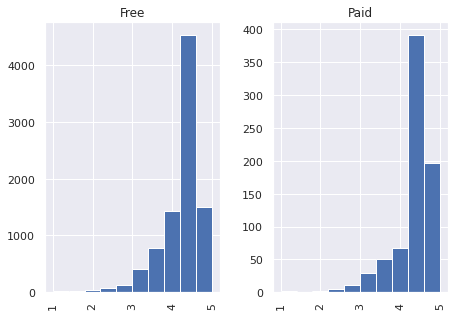

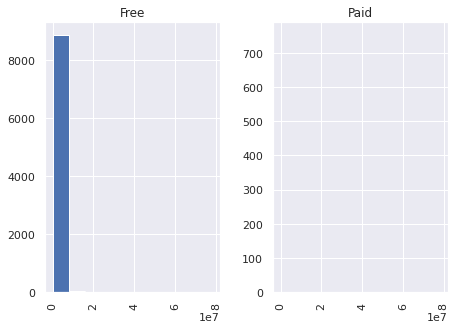

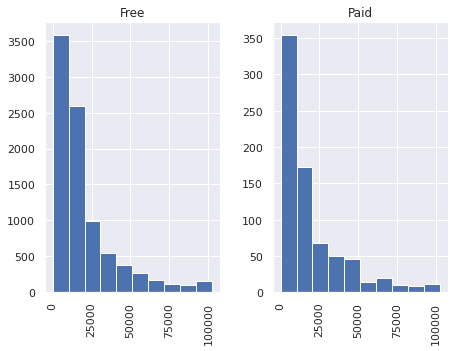

In [ ]:
# Let's understand statistical differences with graphical visualization

top_categories = ps_data_df.groupby("Type").filter(lambda x: len(x) > 0).reset_index()
array = top_categories['Rating'].hist(by=top_categories['Type'], sharex=True, figsize=(7,5))
array = top_categories['Reviews'].hist(by=top_categories['Type'], sharex=True, figsize=(7,5))
array = top_categories['Size'].hist(by=top_categories['Type'], sharex=True, figsize=(7,5))

**Inference :** 
From above stats and grpahs it's pretty clear that both the Free & Paid Apps have drastical diffrence in some basic parameters fo App Business. Some of the Imporant parameters like below,

1. Average Installation count
2. Average Review Count
3. Average Rating

**From above diffreneces we can easily make out below Pros-Cons of respective Business Model.**

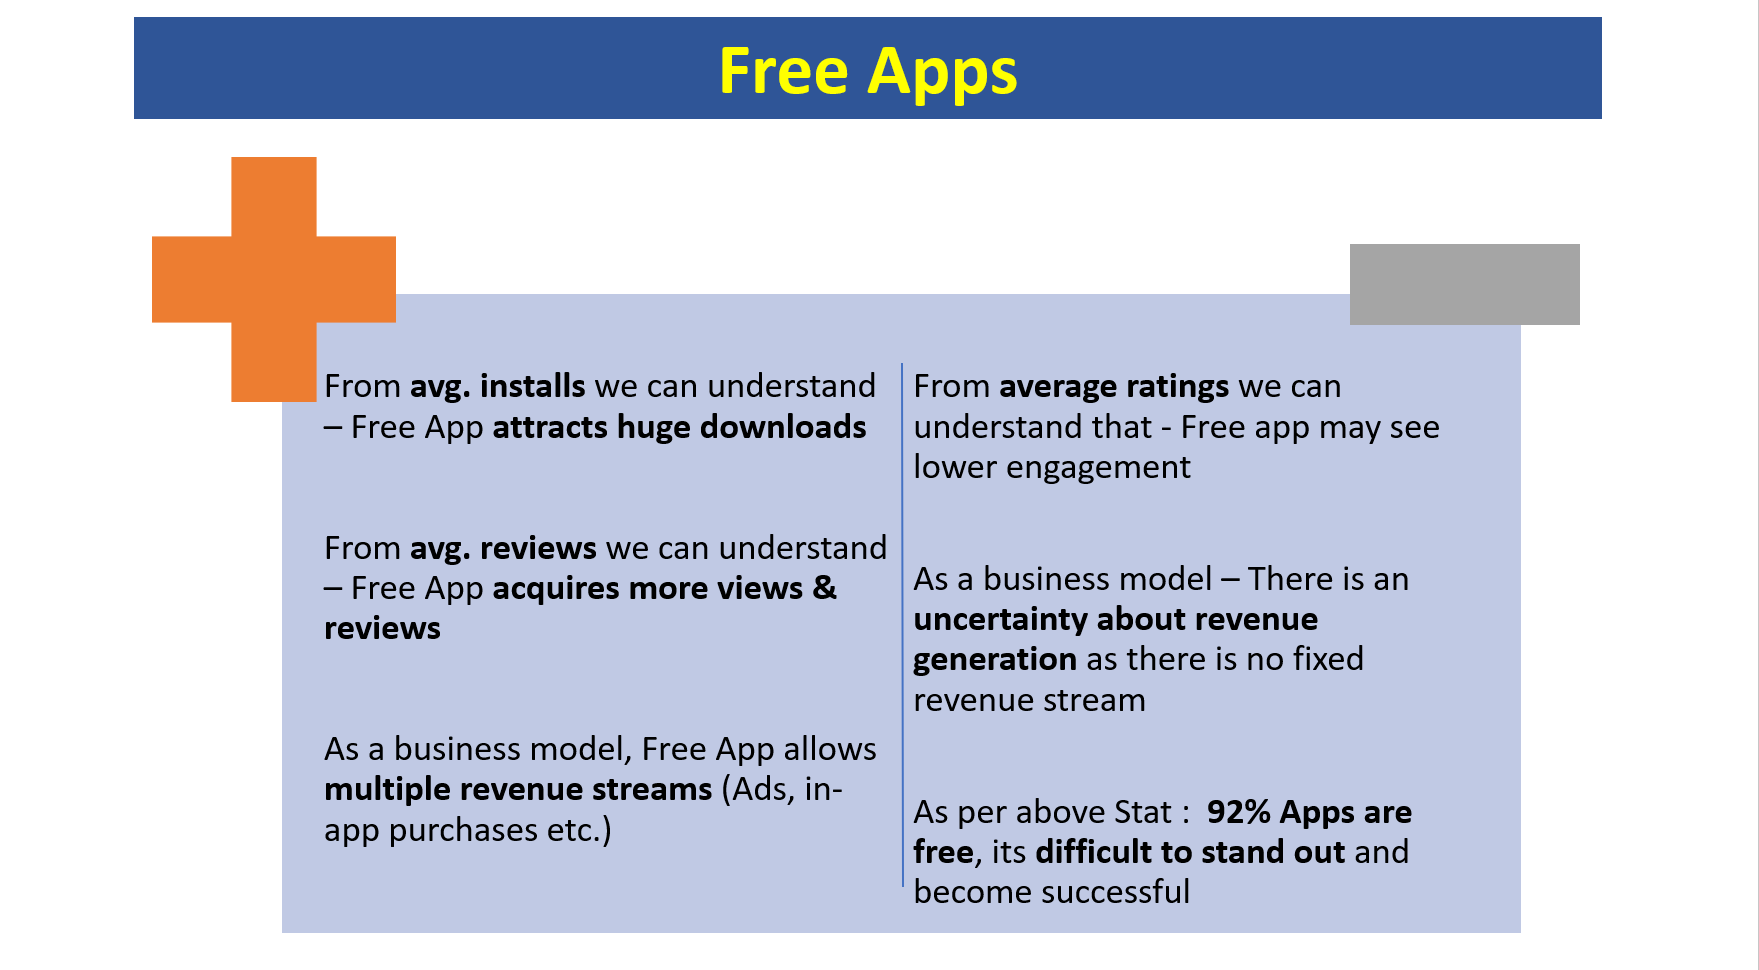

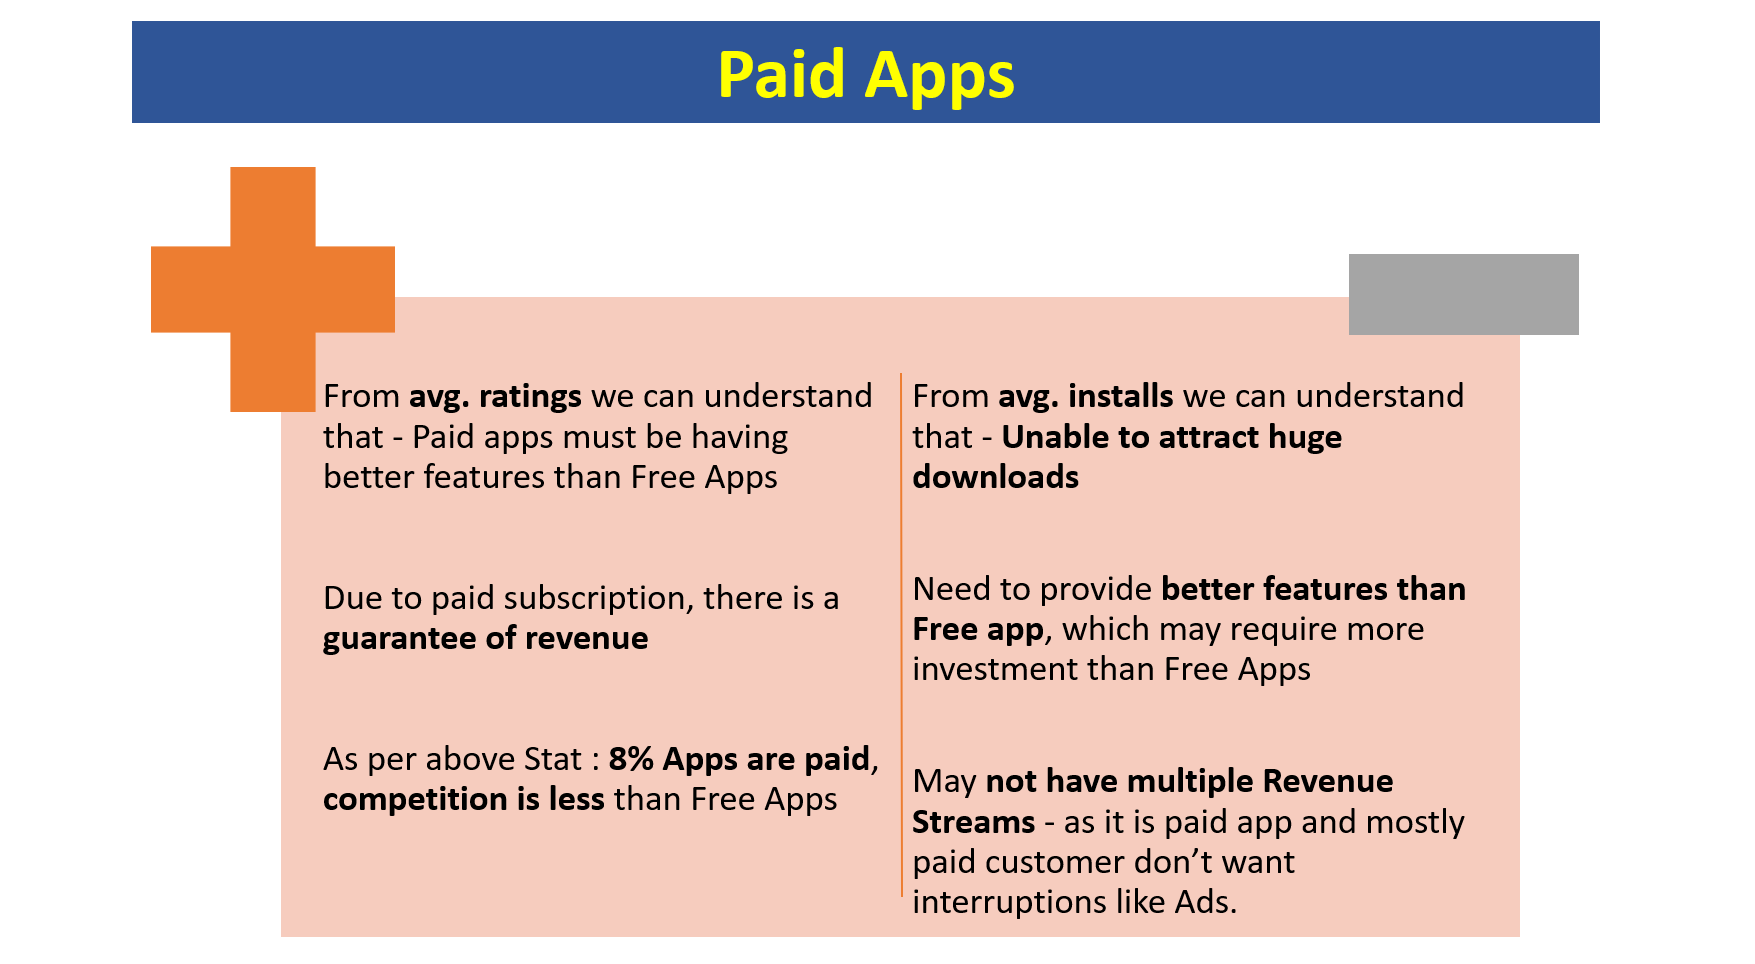

In view of above, both the Business Models have there own Pros & Cons as well as other factors; which makes them Successful / Un-successful in their App making Business.

Hence, both the **Business Models (Free / Paid) are unique** in their own business environment.

Therefore, we cant analyse both as a whole, to understand **Success and Engagement factors of App making Business.**

in order to analyse the Success & Engagement Factors, we need to analyse both the App "Types" separately for respective success factors.

# **DataFrames - Free & Paid Apps**

In [ ]:
# Let's make separate DataFrames for Free Apps and Paid Apps

# Free App Dataframe :

free_app_df = ps_data_df[ps_data_df['Type'] == 'Free']

# Paid App Dataframe :

paid_app_df = ps_data_df[ps_data_df['Type'] == 'Paid']

# Brief Overview of **Data Variable's Relationship**

-----

**Before starting our analysis, let's have a broader understanding of various quantitative variables of the data. So that, we can investigate it further, can extract some imporant inferences fro our Exploratory Data Analysis**

Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features

Text(0.5, 1.02, 'Pairwise Plot - Rating, Size, Installs, Reviews')

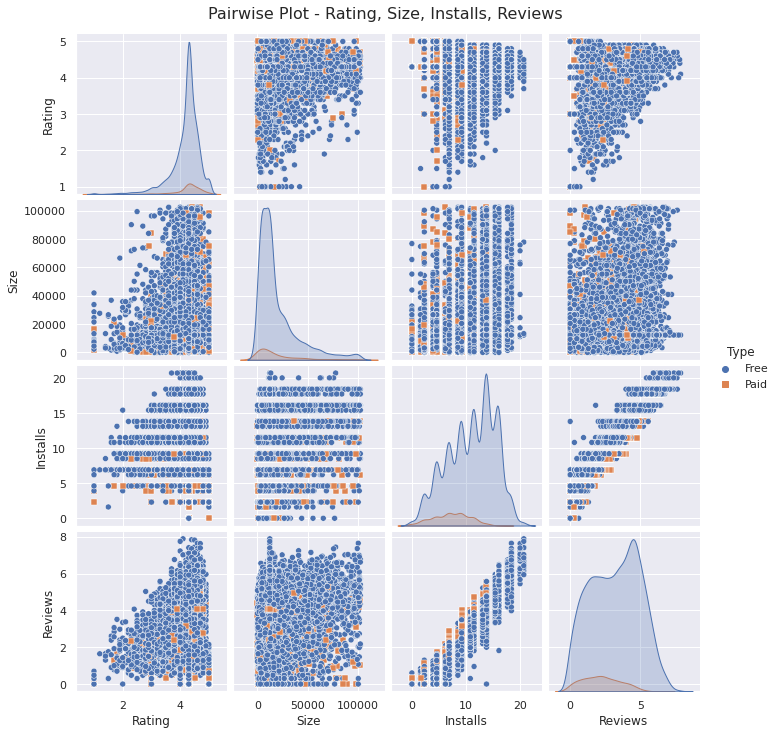

In [ ]:
r = ps_data_df['Rating'].dropna()
s = ps_data_df['Size'].dropna()
i = ps_data_df['Installs'].dropna()
rev = ps_data_df['Reviews'].dropna()
t = ps_data_df['Type'].dropna()

p = sns.pairplot(pd.DataFrame(list(zip(r, s, np.log(i), np.log10(rev), t)), 
                        columns=['Rating','Size', 'Installs', 'Reviews','Type']), hue='Type', markers=["o", "s"])
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews", y=1.02, fontsize=16)

**INFERENCE :**

**Identify Top 10 Performing : Genres | Catgories | Apps**
-----

### Free Apps
-----

**1. Identify Top Performing - Genres**

In [ ]:
# Checked Free App data Stat to understand the "Genres" having Above Average success on Important parameters like,
# Installs | Rating | Reviews

free_app_df.describe()

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
count,8906.000000,8.906000e+03,8906.000000,8.906000e+03,8906.0,8906.000000,8906.000000,8906.000000
mean,4.185616,2.342285e+05,19874.738603,8.446808e+06,0.0,15.634965,6.367617,2017.402650
std,0.495977,1.905351e+06,21021.443022,5.594814e+07,0.0,9.484396,2.624773,1.075797
min,1.000000,0.000000e+00,8.000000,0.000000e+00,0.0,1.000000,1.000000,2010.000000
25%,4.000000,2.900000e+01,5632.000000,1.000000e+03,0.0,6.000000,5.000000,2017.000000
50%,4.300000,1.366500e+03,12288.000000,1.000000e+05,0.0,16.000000,7.000000,2018.000000
75%,4.500000,3.517175e+04,25600.000000,1.000000e+06,0.0,24.000000,8.000000,2018.000000
max,5.000000,7.812821e+07,102400.000000,1.000000e+09,0.0,31.000000,12.000000,2018.000000


**There are three important parameters, which "Customers" check before subscribing any App**
1. No of Installs / Subscriptions
2. Rating of the App
3. No of Reviews recieved by App

-------------------------------------------------------------------------------------------------------------------------------------

**Hence, as per above stat description table, we need to filter out above average performers (Genres | Cateogory | Apps) on below parameters KPIs**

1. Avg Installs = 8.446808e+06
2. Mean Rating = 4.185616 
3. Avg Reviews = 2.342285e+05
-----

In [ ]:
# Filter free app data as per above criteria & check shape of dataset to understand output data

abv_avg_free_app_data_df = free_app_df[ (free_app_df['Installs'] > 8.446808e+06) & (free_app_df['Rating'] > 4.185616) & (free_app_df['Reviews'] > 2.342285e+05)]
abv_avg_free_app_data_df.shape

(784, 16)

In [ ]:
# We have found 784 - Above Average performing free Apps

# Now, let's sort this data in below order and identify Top 10 high performing "Genres" in Free App Business Model

abv_avg_free_app_data_df1 = abv_avg_free_app_data_df.groupby("Genres").mean().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False)
top10_genres_free_df = abv_avg_free_app_data_df1.head(10)
top10_genres_free_df

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
Genres,,,,,,,,
Communication,4.374000,4.177945e+06,14430.160000,1.520000e+08,0.0,13.660000,7.020000,2017.960000
Travel & Local,4.447059,1.343522e+06,15829.823529,1.470588e+08,0.0,10.764706,7.588235,2018.000000
Productivity,4.438889,1.273366e+06,17342.555556,1.250000e+08,0.0,10.416667,7.250000,2017.888889
Social,4.366667,3.945468e+06,22708.900000,1.200000e+08,0.0,13.300000,7.466667,2017.966667
Education;Education,4.700000,6.297590e+06,12288.000000,1.000000e+08,0.0,6.000000,8.000000,2018.000000
Adventure;Action & Adventure,4.500000,4.443407e+06,68608.000000,1.000000e+08,0.0,31.000000,7.000000,2018.000000
News & Magazines,4.383333,1.449862e+06,12569.583333,9.500000e+07,0.0,16.666667,7.333333,2018.000000
Tools,4.470149,3.214588e+06,12501.835821,9.373134e+07,0.0,13.417910,6.865672,2017.910448
Video Players & Editors,4.492000,2.511820e+06,22421.440000,9.320000e+07,0.0,12.640000,7.800000,2017.760000


In [ ]:
top10_genres_free_df1 = top10_genres_free_df.iloc[0:,:0]
top10_genres_free_df1.reset_index()

,Genres
0,Communication
1,Travel & Local
2,Productivity
3,Social
4,Education;Education
5,Adventure;Action & Adventure
6,News & Magazines
7,Tools
8,Video Players & Editors
9,Casual


**2. Identify Top Performing - Categories**

-----

Let's identify Top Performing Free App categories within above Top 10 Genres

In [ ]:
# Merging Top10 genres dataframe with base dataframe (abv_avg_free_app_data_df) to filter App data belongs to these Top10 Genres.

merged_free_top10_genres_df = pd.merge(abv_avg_free_app_data_df, top10_genres_free_df1, how='inner', left_on='Genres', right_on='Genres')
merged_free_top10_genres_df.shape

(269, 16)

In [ ]:
# Now, we have found 269 - Above Average performing free Apps

# Now, let's sort this data in below order and identify Top high performing "Categories" in Free App Business Model

# top_perf_cat_free_df1 = merged_free_top10_genres_df.groupby("Category").mean().sort_values(by = ['Install','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False)
# top10_cat_free_df = top_perf_cat_free_df.head(10)
# top10_cat_free_df

abv_avg_free_app_data_df1 = merged_free_top10_genres_df.groupby("Category").mean().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False)
top10_cat_free_df = abv_avg_free_app_data_df1.head(10)
top10_cat_free_df


,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
Category,,,,,,,,
COMMUNICATION,4.374000,4.177945e+06,14430.160000,1.520000e+08,0.0,13.660000,7.020000,2017.960000
TRAVEL_AND_LOCAL,4.447059,1.343522e+06,15829.823529,1.470588e+08,0.0,10.764706,7.588235,2018.000000
PRODUCTIVITY,4.438889,1.273366e+06,17342.555556,1.250000e+08,0.0,10.416667,7.250000,2017.888889
SOCIAL,4.366667,3.945468e+06,22708.900000,1.200000e+08,0.0,13.300000,7.466667,2017.966667
FAMILY,4.430769,4.273849e+06,43705.076923,1.003846e+08,0.0,16.846154,6.500000,2017.846154
NEWS_AND_MAGAZINES,4.383333,1.449862e+06,12569.583333,9.500000e+07,0.0,16.666667,7.333333,2018.000000
TOOLS,4.470149,3.214588e+06,12501.835821,9.373134e+07,0.0,13.417910,6.865672,2017.910448
VIDEO_PLAYERS,4.492000,2.511820e+06,22421.440000,9.320000e+07,0.0,12.640000,7.800000,2017.760000
GAME,4.533333,4.347306e+06,44373.333333,4.666667e+07,0.0,11.833333,7.000000,2018.000000


In [ ]:
# Let's get Top 10 Category names in Free Apps

top10_cat_free_df1 = top10_cat_free_df.iloc[0:,:0]
top10_cat_free_df1.reset_index()

,Category
0,COMMUNICATION
1,TRAVEL_AND_LOCAL
2,PRODUCTIVITY
3,SOCIAL
4,FAMILY
5,NEWS_AND_MAGAZINES
6,TOOLS
7,VIDEO_PLAYERS
8,GAME


**3. Identify Top Performing - Apps**

-----

Let's identify Top Performing Free App categories within above Top 10 Genres

In [ ]:
# Merging Top categories dataframe with base dataframe (abv_avg_free_app_data_df) to filter App data belongs to these Top Categories.

merged_free_top_cat_df = pd.merge(merged_free_top10_genres_df, top10_cat_free_df1, how='inner', left_on='Category', right_on='Category')
merged_free_top_cat_df.shape

(269, 16)

In [ ]:
# Now, we have found 269 - Above Average performing free Apps

# Now, let's sort this data in below order and identify Top high performing Top 10 "Apps" in Free App Business Model

top10_app_free_df = merged_free_top_cat_df.groupby("App").sum().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10).reset_index()
top10_app_free_df

,App,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
0,Instagram,4.5,66509917.0,12288,1.000000e+09,0.0,31,7,2018
1,WhatsApp Messenger,4.4,69109672.0,12288,1.000000e+09,0.0,3,8,2018
2,Google,4.4,8021623.0,12288,1.000000e+09,0.0,3,8,2018
3,Google Drive,4.4,2728941.0,12288,1.000000e+09,0.0,30,7,2018
4,YouTube,4.3,25623548.0,12288,1.000000e+09,0.0,2,8,2018
5,Google Chrome: Fast & Secure,4.3,9642112.0,12288,1.000000e+09,0.0,1,8,2018
6,Maps - Navigate & Explore,4.3,9231613.0,12288,1.000000e+09,0.0,31,7,2018
7,Gmail,4.3,4604324.0,12288,1.000000e+09,0.0,2,8,2018
8,Google+,4.2,4828372.0,12288,1.000000e+09,0.0,26,7,2018
9,Google Street View,4.2,2129707.0,12288,1.000000e+09,0.0,6,8,2018


### Paid Apps
-----

**1. Identify Top Performing - Genres**

-----

In [ ]:
# Checked Paid App data Stat to understand the "Genres" having Above Average success on Important parameters like,
# Installs | Rating | Reviews

paid_app_df.describe()

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
count,754.000000,7.540000e+02,754.000000,7.540000e+02,754.000000,754.000000,754.000000,754.000000
mean,4.269761,8.746374e+03,18826.030504,7.607929e+04,14.055902,15.555703,6.316976,2016.677719
std,0.497631,8.996140e+04,21743.840806,5.396857e+05,58.821000,8.871980,3.050100,1.555817
min,1.000000,0.000000e+00,14.000000,0.000000e+00,0.990000,1.000000,1.000000,2011.000000
25%,4.200000,6.000000e+00,3379.000000,1.000000e+02,1.490000,8.000000,4.000000,2016.000000
50%,4.300000,8.850000e+01,12288.000000,1.000000e+03,2.990000,16.000000,6.000000,2017.000000
75%,4.600000,1.215250e+03,25600.000000,1.000000e+04,4.990000,23.000000,8.000000,2018.000000
max,5.000000,2.375336e+06,102400.000000,1.000000e+07,400.000000,31.000000,12.000000,2018.000000


There are three important parameters, which "Customers" check before subscribing any App
1. No of Installs / Subscriptions
2. Rating of the App
3. No of Reviews recieved by App

-------------------------------------------------------------------------------------------------------------------------------------

Hence, as per above stat description table, we need to filter out above average performers (Genres | Cateogory | Apps) on below parameters KPIs

1. Avg Installs = 7.607929e+04
2. Median Rating = 4.269761 
3. Avg Reviews = 8.746374e+03
-----

In [ ]:
# Filter paid app data as per above criteria & check shape of dataset to understand output data

abv_avg_paid_app_data_df = paid_app_df[ (paid_app_df['Installs'] > 7.607929e+04) & (paid_app_df['Rating'] > 4.269761) & (paid_app_df['Reviews'] > 8.746374e+03)]
abv_avg_paid_app_data_df.shape

(73, 16)

In [ ]:
# We have found 73 - Above Average performing paid Apps

# Now, let's sort this data in below order and 
# identify Top 20 high performing "Genres" in paid App Business Model (Due to Low App data and to have good sample size to filter it down)

top20_genres_paid_df = abv_avg_paid_app_data_df.groupby("Genres").mean().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(20)
top20_genres_paid_df1= top20_genres_paid_df.iloc[0:,:0]
top20_genres_paid_df1

""
Genres
Arcade;Action & Adventure
Action
Communication
Lifestyle
Sports
Card;Action & Adventure
Arcade
Strategy
Puzzle;Brain Games


**2. Identify Top Performing - Categories**

-----

Let's identify Top Performing Free App categories within above Top 10 Genres

In [ ]:
# Merging Top20 genres dataframe with base dataframe (abv_avg_paid_app_data_df) to filter App data belongs to these Top20 Genres.

merged_paid_top20_genres_df = pd.merge(abv_avg_paid_app_data_df, top20_genres_paid_df1, how='inner', left_on='Genres', right_on='Genres')
merged_paid_top20_genres_df.shape

(60, 16)

In [ ]:
# Now, we have found 60 - Above Average performing paid Apps

# Now, let's sort this data in below order and identify Top 10 high performing "Categories" in Paid App Business Model

top10_cat_paid_df = merged_paid_top20_genres_df.groupby("Category").mean().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10)
top10_cat_paid_df1 = top10_cat_paid_df.iloc[0:,:0]
top10_cat_paid_df1

""
Category
GAME
COMMUNICATION
LIFESTYLE
SPORTS
FAMILY
PHOTOGRAPHY
PERSONALIZATION
TOOLS
PRODUCTIVITY


**3. Identify Top Performing - Apps**

-----

In [ ]:
# Merging Top categories dataframe with base dataframe (merged_paid_top20_genres_df) to filter App data belongs to these Top Categories.

merged_paid_top_cat_df = pd.merge(merged_paid_top20_genres_df, top10_cat_paid_df1, how='inner', left_on='Category', right_on='Category')
merged_paid_top_cat_df.shape

(58, 16)

In [ ]:
# Now, we have found 58 - Above Average performing paid Apps

# Now, let's sort this data in below order and identify high performing Top 10 "Apps" in Paid App Business Model

top10_app_paid_df = merged_paid_top_cat_df.groupby("App").sum().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10)
top10_app_paid_df1 = top10_app_paid_df.iloc[0:,:0]
top10_app_paid_df1

""
App
Hitman Sniper
Minecraft
Where's My Water?
Bloons TD 5
Five Nights at Freddy's
DraStic DS Emulator
Cut the Rope GOLD
Tasker
Threema


# **Installs Data Analysis**

-----

1. Understand relation of **'Installs' and 'App Reviews' - Free Apps**

-----

In [ ]:
insta_rev_free_df = free_app_df.groupby('Installs')['Reviews'].mean().reset_index().sort_values(by = ['Installs'], axis=0, ascending=[False], inplace=False)
insta_rev_free_df

,Installs,Reviews
19,1.000000e+09,2.000252e+07
18,5.000000e+08,9.848708e+06
17,1.000000e+08,4.032929e+06
16,5.000000e+07,1.221054e+06
15,1.000000e+07,3.482721e+05
14,5.000000e+06,1.010718e+05
13,1.000000e+06,3.222234e+04
12,5.000000e+05,8.965377e+03
11,1.000000e+05,2.535830e+03
10,5.000000e+04,7.452867e+02


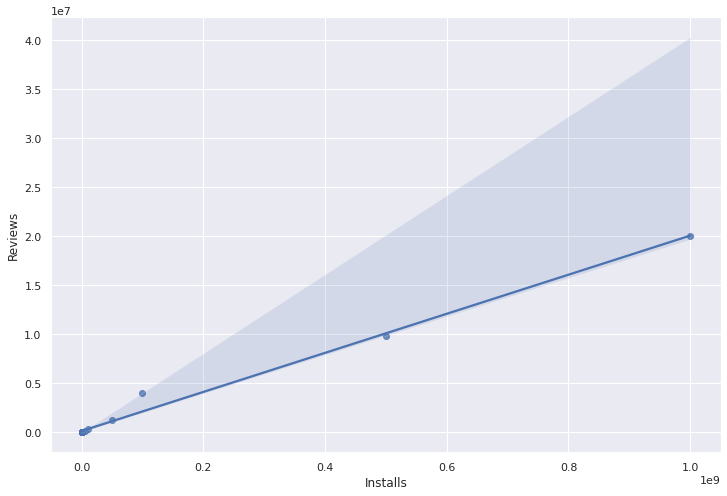

In [ ]:
# Let's undestand relation of Installs and Reviews of App by Graphical Visualtization

# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                  #Giving height and width to the graph
insta_rev_free_df['Installs']=insta_rev_free_df['Installs'].astype(int)         #convert year data to integer type
sns.regplot(data=insta_rev_free_df,x='Installs',y='Reviews')

2. Understand relation of **'Installs' and 'App Reviews' - Paid Apps**

-----

In [ ]:
insta_rev_paid_df = paid_app_df.groupby('Installs')['Reviews'].mean().reset_index().sort_values(by = ['Installs'], axis=0, ascending=[False], inplace=False)
insta_rev_paid_df

,Installs,Reviews
14,10000000.0,1.391814e+06
13,1000000.0,8.924740e+04
12,500000.0,5.111982e+04
11,100000.0,1.410835e+04
10,50000.0,3.399975e+03
9,10000.0,1.160137e+03
8,5000.0,2.847692e+02
7,1000.0,1.047080e+02
6,500.0,3.220000e+01
5,100.0,9.634409e+00


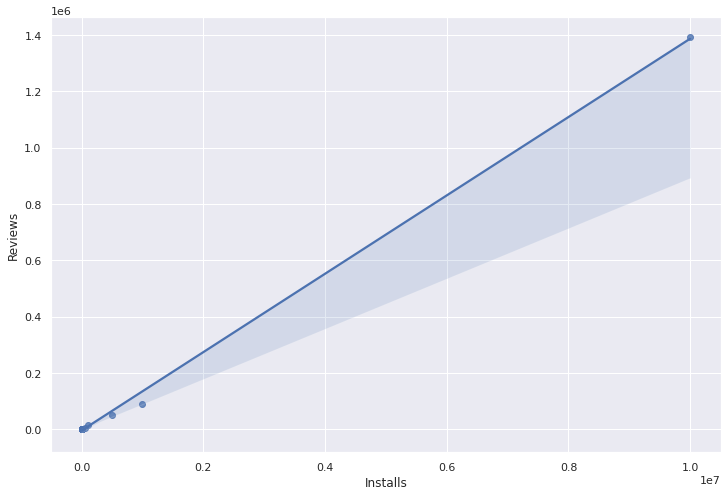

In [ ]:
# Let's undestand relation of Installs and Reviews of App by Graphical Visualtization

# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                  #Giving height and width to the graph
insta_rev_paid_df['Installs']=insta_rev_paid_df['Installs'].astype(int)         #convert year data to integer type
sns.regplot(data=insta_rev_paid_df,x='Installs',y='Reviews')

3. Understand relation of **'Installs' and 'Rating' - Free Apps**

-----

In [ ]:
free_insta_rate_df = free_app_df.groupby(['Installs'])['Rating'].mean().reset_index().sort_values(by=['Installs'], ascending=False)
free_insta_rate_df

,Installs,Rating
19,1.000000e+09,4.215000
18,5.000000e+08,4.375000
17,1.000000e+08,4.386243
16,5.000000e+07,4.333824
15,1.000000e+07,4.297315
14,5.000000e+06,4.227512
13,1.000000e+06,4.213796
12,5.000000e+05,4.161866
11,1.000000e+05,4.092248
10,5.000000e+04,4.025874


In [ ]:
trend_lines = ["ols"]
for trend_line in trend_lines:
    fig = px.scatter(
        free_insta_rate_df, 
        x="Installs",
        y="Rating",
        trendline=trend_line,
        title=f"{trend_line} Trend Line"
    )
    fig.show()

4. Understand relation of **'Installs' and 'Rating' - Paid Apps**

-----

In [ ]:
paid_insta_rate_df = paid_app_df.groupby(['Installs'])['Rating'].mean().reset_index().sort_values(by=['Installs'], ascending=False)
paid_insta_rate_df

,Installs,Rating
14,10000000.0,4.550000
13,1000000.0,4.445000
12,500000.0,4.418182
11,100000.0,4.462195
10,50000.0,4.327500
9,10000.0,4.303419
8,5000.0,4.107692
7,1000.0,4.153285
6,500.0,4.177500
5,100.0,4.244086


In [ ]:
trend_lines = ["ols"]
for trend_line in trend_lines:
    fig = px.scatter(
        paid_insta_rate_df, 
        x="Installs",
        y="Rating",
        trendline=trend_line,
        title=f"{trend_line} Trend Line"
    )
    fig.show()

# **Content Rating Analysis**

-----
-----

**1. Content Rating wise App Count - FREE Apps**

-----

In [ ]:
# Let's understand contribution of each Content Rating Group in Free App Business

free_cont_rate_df = free_app_df.groupby(['Content_Rating'])['App'].count().reset_index().sort_values(by=['App'], ascending=False)

free_cont_rate_df

,Content_Rating,App
1,Everyone,7253
4,Teen,984
3,Mature 17+,375
2,Everyone 10+,291
0,Adults only 18+,3


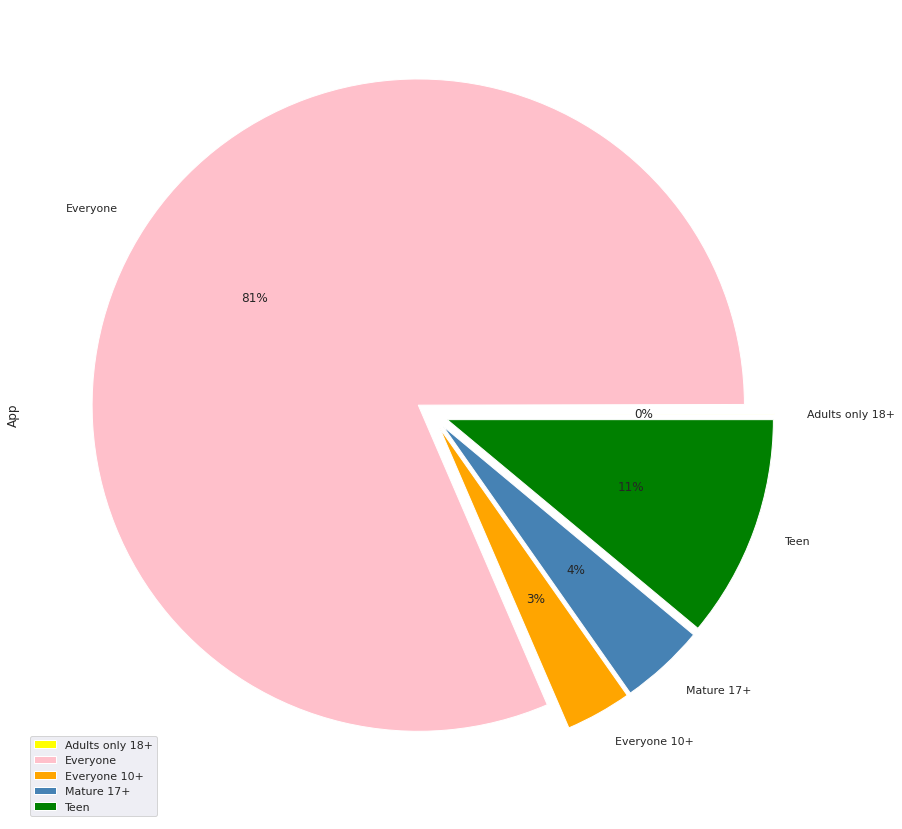

In [ ]:
# Defining colors for the pie chart
colors = ['yellow', 'pink', 'orange', 'steelblue', 'green']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Plotting the pie chart for above dataframe
free_cont_rate_df.groupby(['Content_Rating']).sum().plot(
    kind='pie', y='App', autopct='%1.0f%%',
  colors=colors, explode=explode)

2. Identify **Top 3 Content Rating** Group - Contributing to **"SUCCESSFUL" Free Apps**

-----

In [ ]:
free_cont_rate_stat_df = abv_avg_free_app_data_df.groupby(['Content_Rating'])['Rating','Reviews','Size','Installs'].mean().reset_index().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False)
free_cont_rate_stat_df

,Content_Rating,Rating,Reviews,Size,Installs
0,Everyone,4.443094,1.962228e+06,25415.329650,6.976059e+07
1,Everyone 10+,4.444000,3.711211e+06,51507.200000,6.920000e+07
3,Teen,4.427742,2.384168e+06,38573.741935,6.716129e+07
2,Mature 17+,4.369444,1.773997e+06,28407.444444,4.777778e+07


Here we can conclude Top 3 Content rating Groups contributing to Free App Market are as below,

1. Teen
2. Everyone 10+
3. Everyone

3. **Identify % Contribution of Top 3** Content Rating Groups **in "Free App" Business**

-----

Here we can define Free app success as, Above avg performance of Free Apps

In last segment of Free App analysis, we had identified 784 Apps, who are performing above avg on below Key Performance Indicators

1. Installs / Subscription
2. Reviews

Let's consider same sample size as Successful Free Apps and understand,"Contribution" of Top 3 Content rating groups in their Success

Will check their contribution on two important parameters i.e. "Installs & Reviews"

Let's calculate Total Installs and Reviews of Successful Free Apps

In [ ]:
# Lets calculate Total Installs and Reviews of "Successful" Free Apps

abv_avg_free_app_tot_insta_data_df = abv_avg_free_app_data_df['Installs'].sum()
abv_avg_free_app_tot_rev_data_df = abv_avg_free_app_data_df['Reviews'].sum()

print(f'Successful free app : Total installs are -',{abv_avg_free_app_tot_insta_data_df})
print(f'Successful free app : Total reviews are -',{abv_avg_free_app_tot_rev_data_df})

#-----------------------------------------------------------------------------------------------------------------------------

# Now lets identify Total Installs | Reviews | Rating contributed by Top 2 Content rating groups in Successful Free Apps

top3_cont_rate_contri_pivot = pd.pivot_table(abv_avg_free_app_data_df, values=['Installs','Reviews'], index='Content_Rating',aggfunc='sum')
top3_cont_rate_contri_pivot1 = top3_cont_rate_contri_pivot.drop(['Mature 17+'])
top3_cont_rate_contri_pivot1

top3_cont_rate_contri_pivot_1 = pd.pivot_table(abv_avg_free_app_data_df, values=['Rating'], index='Content_Rating',aggfunc='mean')
top3_cont_rate_contri_pivot1_1 = top3_cont_rate_contri_pivot_1.drop(['Mature 17+'])
top3_cont_rate_contri_pivot1_1

# Let's calculate Total Installs and Reviews of Successful Free Apps

top3_cont_rate_tot_insta_df = top3_cont_rate_contri_pivot1['Installs'].sum()
top3_cont_rate_tot_rev_df = top3_cont_rate_contri_pivot1['Reviews'].sum()

print(f'Top 3 Content Rating Group : Total installs are -',{top3_cont_rate_tot_insta_df})
print(f'Top 3 Content Rating Group : Total reviews are -',{top3_cont_rate_tot_rev_df})

Successful free app : Total installs are - {53470000000.0}
Successful free app : Total reviews are - {1684460161.0}
Top 3 Content Rating Group : Total installs are - {51750000000.0}
Top 3 Content Rating Group : Total reviews are - {1620596264.0}


In [ ]:
# Lets calculate percentage contribution of these Top 3 content ratings

top3_contri_install_df = top3_cont_rate_tot_insta_df / abv_avg_free_app_tot_insta_data_df
top3_contri_reviews_df = top3_cont_rate_tot_rev_df / abv_avg_free_app_tot_rev_data_df

avg_contri_top3_cont_rate_contri_df = (top3_contri_install_df + top3_contri_reviews_df) / 2*100
print(f'Total Avg. % Contribution of - Top 3 Content Rating Groups are :',{avg_contri_top3_cont_rate_contri_df})

Total Avg. % Contribution of - Top 3 Content Rating Groups are : {96.49594300638311}


Here we can conclude that below **Top 3 Content rating Groups contributing to Free App Market at the extent of 96.5%,**

1. Teen
2. Everyone 10+
3. Everyone

**4. Content Rating wise App Count - PAID Apps**

-----

In [ ]:
paid_cont_rate_df = paid_app_df.groupby(['Content_Rating'])['App'].count().reset_index().sort_values(by=['App'], ascending=False)

paid_cont_rate_df

,Content_Rating,App
0,Everyone,653
3,Teen,52
1,Everyone 10+,31
2,Mature 17+,18


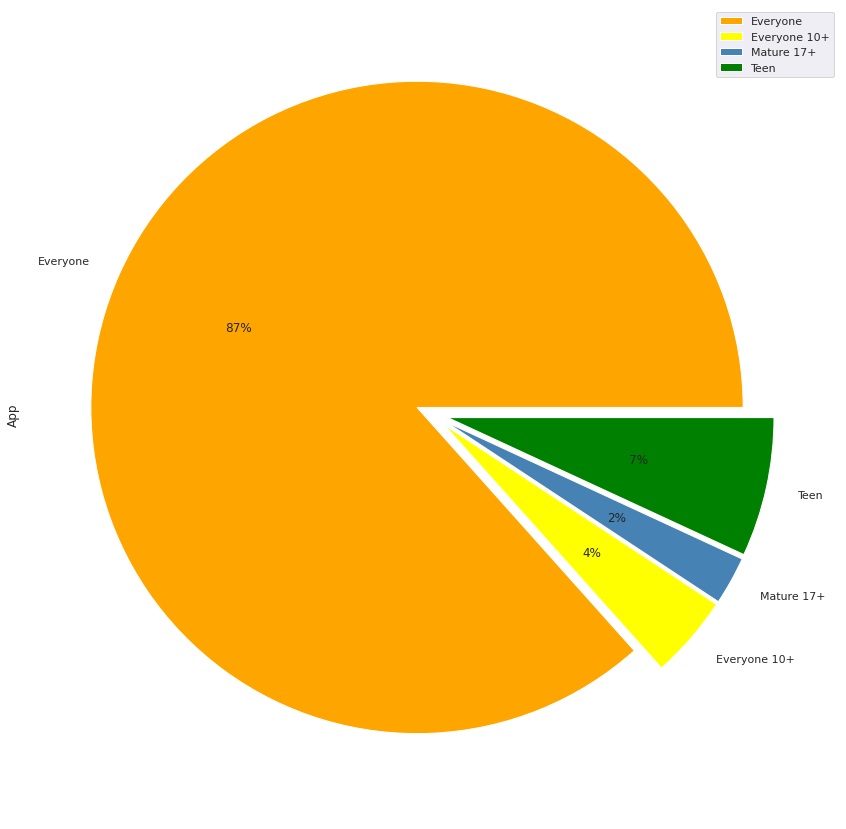

In [ ]:
# Defining colors for the pie chart
colors = ['orange', 'yellow', 'steelblue', 'green']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05)
  
# Plotting the pie chart for above dataframe
paid_cont_rate_df.groupby(['Content_Rating']).sum().plot(
    kind='pie', y='App', autopct='%1.0f%%',
  colors=colors, explode=explode)

5. Identify **Top 3 Content Rating** Group - Contributing to **"SUCCESSFUL" Paid Apps**

-----

In [ ]:
paid_cont_rate_stat_df = abv_avg_paid_app_data_df.groupby(['Content_Rating'])['Rating','Reviews','Size','Installs'].mean().reset_index().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False)
paid_cont_rate_stat_df

,Content_Rating,Rating,Reviews,Size,Installs
2,Mature 17+,4.500000,378627.000000,28160.000000,5.500000e+06
1,Everyone 10+,4.500000,338314.000000,43904.000000,1.725000e+06
0,Everyone,4.565306,39785.040816,24360.040816,3.775510e+05
3,Teen,4.521429,32151.285714,44609.714286,3.214286e+05


In [ ]:
# Here we can conclude Top 3 Content rating Groups contributing to Paid App Market are as below,

# 1. Mature 17+
# 2. Everyone 10+
# 3. Everyone

# (Due to less volume and only 4 Content Rating Groups of paid apps considering Top 2 Content Rating Groups for analysis)

6. **Identify % Contribution of Top 2** Content Rating Groups **in "Paid App" Business**

-----

Here we can define Paid app success as, Above avg performance of Paid Apps

In last segment of Paid App analysis, we had identified 73 Apps, who are performing above avg on below Key Performance Indicators

1. Installs / Subscription
2. Reviews

Let's consider same sample size as Successful Paid Apps and understand,"Contribution" of Top 3 Content rating groups in their Success

Will check their contribution on two important parameters i.e. "Installs & Reviews"

In [ ]:
# Now lets identify Total Installs | Reviews contributed by Top 2 Content rating groups in Successful Paid Apps

top3_paid_cont_rate_contri_pivot = pd.pivot_table(abv_avg_paid_app_data_df, values=['Installs','Reviews'], index='Content_Rating',aggfunc='sum')
top3_paid_cont_rate_contri_pivot1 = top3_paid_cont_rate_contri_pivot.drop(['Teen'])
top3_paid_cont_rate_contri_pivot1

top3_paid_cont_rate_contri_pivot_1 = pd.pivot_table(abv_avg_paid_app_data_df, values=['Rating'], index='Content_Rating',aggfunc='sum')
top3_paid_cont_rate_contri_pivot1_1 = top3_paid_cont_rate_contri_pivot_1.drop(['Teen'])
top3_paid_cont_rate_contri_pivot1_1

# Let's calculate Total Installs and Reviews of Successful Paid Apps

top3_paid_cont_rate_tot_insta_df = top3_paid_cont_rate_contri_pivot1['Installs'].sum()
top3_paid_cont_rate_tot_rev_df = top3_paid_cont_rate_contri_pivot1['Reviews'].sum()

print(f'Top 3 Content Rating Group_Paid App : Total installs are -',{top3_cont_rate_tot_insta_df})
print(f'Top 3 Content Rating Group_Paid App : Total reviews are -',{top3_cont_rate_tot_rev_df})

# Let's calculate Total Installs and Reviews of Successful Paid Apps

abv_avg_paid_app_tot_insta_data_df = abv_avg_paid_app_data_df['Installs'].sum()
abv_avg_paid_app_tot_rev_data_df = abv_avg_paid_app_data_df['Reviews'].sum()

print(f'Successful paid app : Total installs are -',{abv_avg_paid_app_tot_insta_data_df})
print(f'Successful paid app : Total reviews are -',{abv_avg_paid_app_tot_rev_data_df})

Top 3 Content Rating Group_Paid App : Total installs are - {51750000000.0}
Top 3 Content Rating Group_Paid App : Total reviews are - {1620596264.0}
Successful paid app : Total installs are - {47800000.0}
Successful paid app : Total reviews are - {5863351.0}


In [ ]:
# Lets calculate percentage contribution of these Top 3 content ratings

top3_paid_contri_install_df = top3_paid_cont_rate_tot_insta_df / abv_avg_paid_app_tot_insta_data_df
top3_paid_contri_reviews_df = top3_paid_cont_rate_tot_rev_df / abv_avg_paid_app_tot_rev_data_df

avg_paid_top3_cont_rate_contri_df = (top3_paid_contri_install_df + top3_paid_contri_reviews_df) / 2*100
print(f'Total Avg. % Contribution of - Top 3 Content Rating Groups to Paid Apps is :',{avg_paid_top3_cont_rate_contri_df})

Total Avg. % Contribution of - Top 3 Content Rating Groups to Paid Apps is : {91.45448472316717}


Here we can conclude that below **Top 3 Content rating Groups contributing to Free App Market at the extent of 91.5%,**

1. Mature 17+
2. Everyone 10+
3. Everyone

7. **Top 3 Content Rating Groups** extending **best Ratings - FREE Apps**

-----

In [ ]:
free_cont_rate_stat_df2 = abv_avg_free_app_data_df.groupby(['Content_Rating'])['Rating'].mean().reset_index().sort_values(by = ['Rating'], axis=0, ascending=[False], inplace=False)
free_cont_rate_stat_df2

,Content_Rating,Rating
1,Everyone 10+,4.444000
0,Everyone,4.443094
3,Teen,4.427742
2,Mature 17+,4.369444


8. **Top 3 Content Rating Groups** extending **best Ratings - PAID Apps**

-----

In [ ]:
paid_cont_rate_stat_df2 = abv_avg_paid_app_data_df.groupby(['Content_Rating'])['Rating'].mean().reset_index().sort_values(by = ['Rating'], axis=0, ascending=[False], inplace=False)
paid_cont_rate_stat_df2

,Content_Rating,Rating
0,Everyone,4.565306
3,Teen,4.521429
1,Everyone 10+,4.500000
2,Mature 17+,4.500000


# Preferred **FREE Apps** by - **Top 3 - Most Contributing** - Content Rating Group

8. **Identify Top 10 FREE Apps - Preferred by "Everyone" Content Rating**

-----

In [ ]:
everyone_free_app_df = free_app_df[free_app_df['Content_Rating'] == 'Everyone']
everyone_free_app_df.shape

(7253, 16)

In [ ]:
# Most preferred Apps can be selected on below criteria

# 1. Most Installs
# 2. High Rating
# 3. Most Reviews

# Accordingly, lets sort our dataframe and find most preferred 10 free apps by "Everyone" category

top10_every_free_app_df = everyone_free_app_df.groupby(['App'])['Category', 'Rating', 'Reviews', 'Installs'].sum().reset_index().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10)
top10_every_free_app_df

,App,Rating,Reviews,Installs
3839,Google Photos,4.5,10847682.0,1.000000e+09
6812,WhatsApp Messenger,4.4,69109672.0,1.000000e+09
3815,Google,4.4,8021623.0,1.000000e+09
3827,Google Drive,4.4,2728941.0,1.000000e+09
3824,Google Chrome: Fast & Secure,4.3,9642112.0,1.000000e+09
4624,Maps - Navigate & Explore,4.3,9231613.0,1.000000e+09
3780,Gmail,4.3,4604324.0,1.000000e+09
3843,Google Street View,4.2,2129707.0,1.000000e+09
5966,Skype - free IM & video calls,4.1,10484169.0,1.000000e+09
4707,Messenger – Text and Video Chat for Free,4.0,56642847.0,1.000000e+09


9. **Identify Top 10 FREE Apps - Preferred by "Everyone 10+" Content Rating**

-----

In [ ]:
everyone10_free_app_df = free_app_df[free_app_df['Content_Rating'] == 'Everyone 10+']
everyone10_free_app_df.shape

(291, 16)

In [ ]:
# Most preferred Apps can be selected on below criteria

# 1. Most Installs
# 2. High Rating
# 3. Most Reviews

# Accordingly, lets sort our dataframe and find most preferred 10 free apps by "Everyone 10+" category

top10_every10_free_app_df = everyone10_free_app_df.groupby(['App'])['Category', 'Rating', 'Reviews', 'Installs'].sum().reset_index().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10)
top10_every10_free_app_df

,App,Rating,Reviews,Installs
240,Subway Surfers,4.5,27711703.0,1.000000e+09
134,Flipboard: News For Our Time,4.4,1284018.0,5.000000e+08
67,Clash of Clans,4.6,44881447.0,1.000000e+08
66,Clash Royale,4.6,23125280.0,1.000000e+08
224,Shadow Fight 2,4.6,10981850.0,1.000000e+08
180,Minion Rush: Despicable Me Official Game,4.5,10214862.0,1.000000e+08
213,ROBLOX,4.5,4443407.0,1.000000e+08
278,Zombie Tsunami,4.4,4918776.0,1.000000e+08
161,Jetpack Joyride,4.4,4637439.0,1.000000e+08
205,Plants vs. Zombies FREE,4.4,4064868.0,1.000000e+08


10. **Identify Top 10 FREE Apps - Preferred by "Teen" Content Rating**

-----

In [ ]:
teen_free_app_df = free_app_df[free_app_df['Content_Rating'] == 'Teen']
teen_free_app_df.shape

(984, 16)

In [ ]:
# Most preferred Apps can be selected on below criteria

# 1. Most Installs
# 2. High Rating
# 3. Most Reviews

# Accordingly, lets sort our dataframe and find most preferred 10 free apps by "Teen" category

top10_teen_free_app_df = teen_free_app_df.groupby(['App'])['Category', 'Rating', 'Reviews', 'Installs'].sum().reset_index().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10)
top10_teen_free_app_df

,App,Rating,Reviews,Installs
526,Instagram,4.5,66509917.0,1.000000e+09
937,YouTube,4.3,25623548.0,1.000000e+09
455,Google Play Games,4.3,7168735.0,1.000000e+09
457,Google+,4.2,4828372.0,1.000000e+09
386,Facebook,4.1,78128208.0,1.000000e+09
454,Google Play Books,3.9,1433233.0,1.000000e+09
453,Google News,3.9,878065.0,1.000000e+09
456,Google Play Movies & TV,3.7,906384.0,1.000000e+09
863,UC Browser - Fast Download Private & Secure,4.5,17712922.0,5.000000e+08
388,Facebook Lite,4.3,8595964.0,5.000000e+08


# Preferred **PAID Apps** by - **Top 3 - Most Contributing** - Content Rating Group

11. **Identify Top 10 PAID Apps - Preferred by "Mature 17+" Content Rating**

-----

In [ ]:
mat17_paid_app_df = paid_app_df[paid_app_df['Content_Rating'] == 'Mature 17+']
mat17_paid_app_df.shape

(18, 16)

In [ ]:
# Most preferred Apps can be selected on below criteria

# 1. Most Installs
# 2. High Rating
# 3. Most Reviews

# Accordingly, lets sort our dataframe and find most preferred 10 free apps by "Mature 17+" category

top10_mat17_paid_app_df = mat17_paid_app_df.groupby(['App'])['Category', 'Rating', 'Reviews', 'Installs'].sum().reset_index().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10)
top10_mat17_paid_app_df

,App,Rating,Reviews,Installs
9,Hitman Sniper,4.6,408292.0,10000000.0
7,Grand Theft Auto: San Andreas,4.4,348962.0,1000000.0
11,Meme Generator,4.6,3771.0,100000.0
16,XCOM®: Enemy Within,4.2,13752.0,100000.0
12,Mental Hospital V,4.2,2460.0,50000.0
4,Essential Anatomy 3,4.1,1533.0,50000.0
14,"Moco+ - Chat, Meet People",4.2,1546.0,10000.0
8,H*nest Meditation,4.9,145.0,5000.0
15,"Q Alerts: QAnon Drop Notifications, Research +++",4.7,143.0,5000.0
17,myGrow,4.6,84.0,1000.0


11. **Identify Top 10 PAID Apps - Preferred by "Everyone 10+" Content Rating**

-----

In [ ]:
every10_paid_app_df = paid_app_df[paid_app_df['Content_Rating'] == 'Everyone 10+']
every10_paid_app_df.shape

(31, 16)

In [ ]:
# Most preferred Apps can be selected on below criteria

# 1. Most Installs
# 2. High Rating
# 3. Most Reviews

# Accordingly, lets sort our dataframe and find most preferred 10 free apps by "Everyone 10+" category

top10_every10_paid_app_df = every10_paid_app_df.groupby(['App'])['Category', 'Rating', 'Reviews', 'Installs'].sum().reset_index().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10)
top10_every10_paid_app_df

,App,Rating,Reviews,Installs
18,Minecraft,4.5,2375336.0,10000000.0
24,Stickman Legends: Shadow Wars,4.4,38419.0,1000000.0
2,Card Wars - Adventure Time,4.3,129603.0,1000000.0
14,Infinity Dungeon VIP,4.3,21804.0,1000000.0
13,Hitman GO,4.6,84114.0,500000.0
5,Cytus II,4.7,16851.0,100000.0
22,Riptide GP: Renegade,4.7,4328.0,100000.0
26,Teeny Titans - Teen Titans Go!,4.6,20463.0,100000.0
3,Clue,4.6,19922.0,100000.0
11,Guns'n'Glory WW2 Premium,4.5,4656.0,100000.0


12. **Identify Top 10 PAID Apps - Preferred by "Everyone" Content Rating**

-----

In [ ]:
every_paid_app_df = paid_app_df[paid_app_df['Content_Rating'] == 'Everyone']
every_paid_app_df.shape

(653, 16)

In [ ]:
# Most preferred Apps can be selected on below criteria

# 1. Most Installs
# 2. High Rating
# 3. Most Reviews

# Accordingly, lets sort our dataframe and find most preferred 10 Paid apps by "Everyone" category

top10_every_paid_app_df = every_paid_app_df.groupby(['App'])['Category', 'Rating', 'Reviews', 'Installs'].sum().reset_index().sort_values(by = ['Installs','Rating','Reviews'], axis=0, ascending=[False, False, False], inplace=False).head(10)
top10_every_paid_app_df

,App,Rating,Reviews,Installs
596,Where's My Water?,4.7,188740.0,1000000.0
121,Bloons TD 5,4.6,190086.0,1000000.0
221,DraStic DS Emulator,4.6,87766.0,1000000.0
176,Cut the Rope GOLD,4.6,61264.0,1000000.0
537,Tasker,4.6,43045.0,1000000.0
554,Threema,4.5,51110.0,1000000.0
373,Lost Journey (Dreamsky),4.5,32344.0,1000000.0
514,Sleep as Android Unlock,4.5,23966.0,1000000.0
566,True Skate,4.4,129409.0,1000000.0
275,Facetune - For Free,4.4,49553.0,1000000.0


# **App Size impact Analysis**

-----
-----

# FREE APPS

1. Most **Preferred Size** - for Successful Free Apps 

In [ ]:
abv_avg_free_app_data_df['Size'].describe()

count       784.000000
mean      29818.216837
std       26343.315824
min        1228.000000
25%       12288.000000
50%       12288.000000
75%       46080.000000
max      102400.000000
Name: Size, dtype: float64

As per above stat, Avg. App Size (mostly accepted size) preferred by people for "Free Apps" is 29 MB
Median size of the "Free App" is 12 MB (more 50% apps have 12+ MB App Size)

From above 2 observations, we can conclude that to make a Successful and most acceptable Free App, it's size should be in the range of 12 to 30 MB

-----

1. Most **Preferred Size** - for Successful Paid Apps 

In [ ]:
abv_avg_paid_app_data_df['Size'].describe()

count        73.000000
mean      30489.452055
std       27352.354761
min          50.000000
25%       12288.000000
50%       21504.000000
75%       44032.000000
max      102400.000000
Name: Size, dtype: float64

# **INFERENCE :** 

As per above stat, Avg. App Size (mostly accepted size) preferred by people for "Paid Apps" is 29 MB

Median size of the "Free App" is 23 MB (more 50% apps have 23+ MB App Size)
Paid Apps consist of higher qaulity and features in the App. Due to paid model customer expect high quality and more features in Paid Apps.
Due to these features and quality App size is on higher side as compared to Free Apps.

Hence, here median of App size in 23 MB. Hence, more than 50% Paid Apps are having 23+ MB size and people have accepted the same.

As per above observations, successful paid app size should be betwwen range of 23 to 30 MB

But because of additional features and quality, we need to assume higher side of Paid App size range slightly more.

Here we can consider 3rd quartile size of paid App, which is 43 MB to recommend appropriate most prefrred size to amke a successful Paid App, with desired features and quality

From above observations, we can conclude that to make a Successful and most acceptable Paid App, it's size should be in the range of 23 to 43 MB

-----

Most preferred **Avg App Size** by **Content Rating** Groups - Free App

In [ ]:
cont_rate_wise_size_free_df = abv_avg_free_app_data_df.groupby(['Content_Rating'])['Size'].mean().reset_index().sort_values(by = ['Size'], axis=0, ascending=[False], inplace=False)
cont_rate_wise_size_free_df

,Content_Rating,Size
1,Everyone 10+,51507.200000
3,Teen,38573.741935
2,Mature 17+,28407.444444
0,Everyone,25415.329650


Most preferred **Avg App Size** by **Content Rating** Groups - Paid App

In [ ]:
# cont_rate_wise_size_paid_df = abv_avg_paid_app_data_df.groupby(['Content_Rating'])['Size'].mean().reset_index().sort_values(by = ['Size'], axis=0, ascending=[False], inplace=False)
# cont_rate_wise_size_paid_df

Top 5 **Heavy Free App Categories** (Size)

In [ ]:
top5_heavy_size_free_df = abv_avg_free_app_data_df.groupby(['Category'])['Size'].mean().reset_index().sort_values(by = ['Size'], axis=0, ascending=[False], inplace=False).head(5)
top5_heavy_size_free_df

,Category,Size
19,PARENTING,63488.000000
9,FAMILY,47610.154472
12,GAME,46954.540541
10,FINANCE,42170.181818
25,SPORTS,34443.636364


Top 5 **Heavy Paid App Categories** (Size)

In [ ]:
top5_heavy_size_paid_df = abv_avg_paid_app_data_df.groupby(['Category'])['Size'].mean().reset_index().sort_values(by = ['Size'], axis=0, ascending=[False], inplace=False).head(5)
top5_heavy_size_paid_df

,Category,Size
10,SPORTS,74752.000000
4,GAME,48038.375000
2,FAMILY,30760.900000
0,BUSINESS,23449.500000
8,PHOTOGRAPHY,20684.333333


Correlation of **IMP Success Factors** - **Free Apps**

In [ ]:
# Created DataFrame for correlation between all important numerical parameters - Successful Free Apps

free_corr_df =free_app_df[['Rating','Reviews','Size','Installs']]
free_corr_df =free_corr_df.corr()
free_corr_df

,Rating,Reviews,Size,Installs
Rating,1.000000,0.053833,0.033291,0.037836
Reviews,0.053833,1.000000,0.068608,0.624566
Size,0.033291,0.068608,1.000000,0.031189
Installs,0.037836,0.624566,0.031189,1.000000


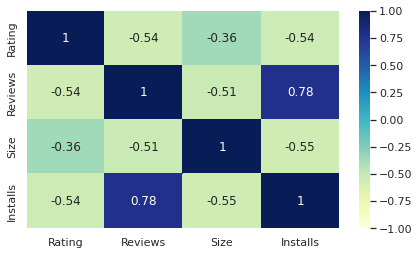

In [ ]:
# Heatmap of correlation - Free Apps
plt.figure(figsize=(7,4))
sns.heatmap(free_corr_df.corr(), vmin=-1, cmap='YlGnBu', annot=True, annot_kws={'size':12})
plt.show()

Correlation of **IMP Success Factors** - **Paid Apps**

In [ ]:
# Created DataFrame for correlation between all important numerical parameters - Successful Paid Apps

paid_corr_df =paid_app_df[['Rating','Reviews','Size','Price','Installs']]
paid_corr_df =paid_corr_df.corr()
paid_corr_df

,Rating,Reviews,Size,Price,Installs
Rating,1.000000,0.043375,0.094592,-0.105202,0.057301
Reviews,0.043375,1.000000,0.034179,-0.014430,0.807592
Size,0.094592,0.034179,1.000000,-0.058724,0.075922
Price,-0.105202,-0.014430,-0.058724,1.000000,-0.021551
Installs,0.057301,0.807592,0.075922,-0.021551,1.000000


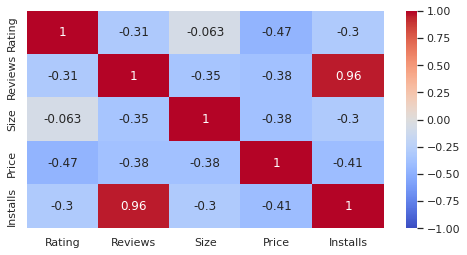

In [ ]:
# Heatmap of correlation - Free Apps
plt.figure(figsize=(8,4))
sns.heatmap(paid_corr_df.corr(), vmin=-1, cmap='coolwarm', annot=True, annot_kws={'size':12})
plt.show()

## **Size & Last Update** Relation Check

-----

## FREE App Last Update & Size Relation



In [ ]:
# Lets check last Update impact on size

updt_size_free_df = free_app_df.groupby('LastUpdated_Year')['Size'].mean().reset_index().sort_values(by = ['LastUpdated_Year'], axis=0, ascending=[False], inplace=False)
updt_size_free_df

,LastUpdated_Year,Size
8,2018,22253.172929
7,2017,17544.129926
6,2016,14386.251089
5,2015,10766.744565
4,2014,8798.664430
3,2013,6900.137500
2,2012,3749.619048
1,2011,1923.833333
0,2010,209.000000


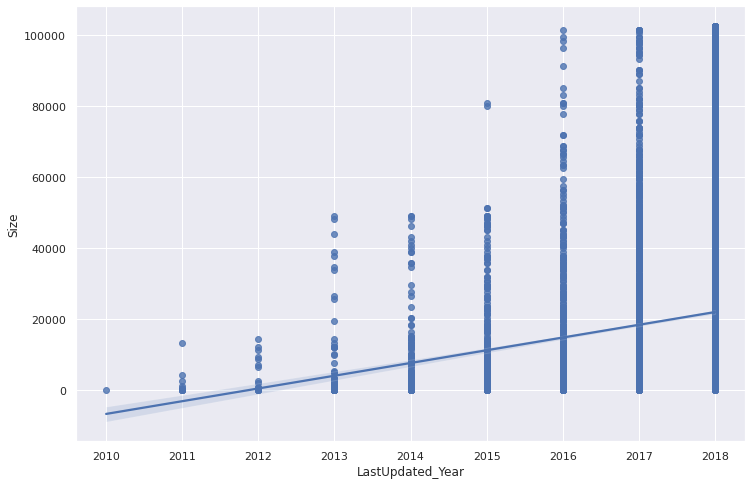

In [ ]:
# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                  #Giving height and width to the graph
free_app_df['LastUpdated_Year']=free_app_df['LastUpdated_Year'].astype(int)     #convert year data to integer type
sns.regplot(data=free_app_df,x='LastUpdated_Year',y='Size')                     #using seaborn.regplot to get rating trend with year

## PAID App Last Update & Size Relation

-----

In [ ]:
# Lets check last Update impact on size

updt_size_paid_df = paid_app_df.groupby('LastUpdated_Year')['Size'].mean().reset_index().sort_values(by = ['LastUpdated_Year'], axis=0, ascending=[False], inplace=False)
updt_size_paid_df

,LastUpdated_Year,Size
7,2018,21278.404321
6,2017,19993.658824
5,2016,23176.777778
4,2015,10338.375000
3,2014,13170.574074
2,2013,9607.357143
1,2012,1673.800000
0,2011,45.333333


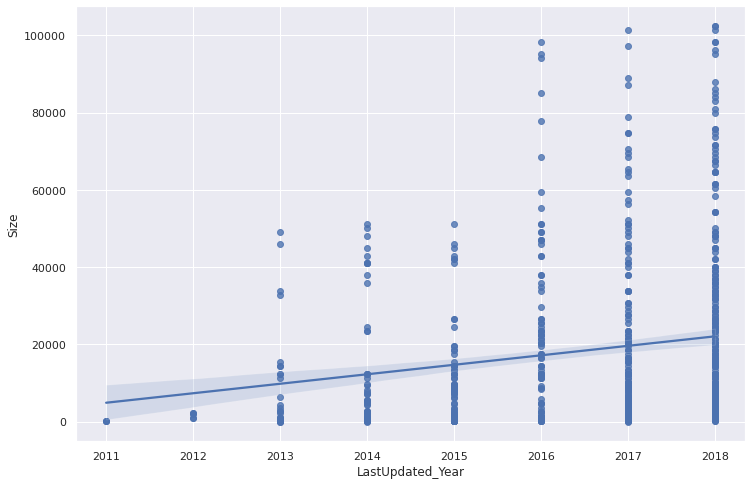

In [ ]:
# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                  #Giving height and width to the graph
paid_app_df['LastUpdated_Year']=paid_app_df['LastUpdated_Year'].astype(int)     #convert year data to integer type
sns.regplot(data=paid_app_df,x='LastUpdated_Year',y='Size') 

**Avg App Size - Top 10 - Genres | Categories | Apps - FREE APP**

-----

In [ ]:
# Let's understand avg. app size for Free Top 10 Genres | Categories | Apps 

top10_free_gen_avg_size_df = top10_genres_free_df['Size'].mean()
print(f'Top-10 Free App Genre have Avg. App Size of (in MB):',{top10_free_gen_avg_size_df})

top10_free_cat_avg_size_df = top10_cat_free_df['Size'].mean()
print(f'Top-10 Free App Categories have Avg. App Size of (in MB):',{top10_free_cat_avg_size_df})

top10_free_app_avg_size_df = top10_app_free_df['Size'].mean()
print(f'Top-10 Free Apps have Avg. App Size of (in MB):',{top10_free_app_avg_size_df})

Top-10 Free App Genre have Avg. App Size of (in MB): {24275.616490586286}
Top-10 Free App Categories have Avg. App Size of (in MB): {22875.85649951183}
Top-10 Free Apps have Avg. App Size of (in MB): {12288.0}


**Avg App Size - Top 10 - Genres | Categories | Apps - PAID APP**

-----

In [ ]:
# Let's understand avg. app size for Paid Top 10 Genres | Categories | Apps 

top20_paid_gen_avg_size_df = top20_genres_paid_df['Size'].mean()                              # Due to sample size, had considered Top 20 Genres
print(f'Top-10 Paid App Genre have Avg. App Size of (in MB):',{top20_paid_gen_avg_size_df})

top10_paid_cat_avg_size_df = top10_cat_paid_df['Size'].mean()
print(f'Top-10 Paid App Categories have Avg. App Size of (in MB):',{top10_paid_cat_avg_size_df})

top10_paid_app_avg_size_df = top10_app_paid_df['Size'].mean()
print(f'Top-10 Paid Apps have Avg. App Size of (in MB):',{top10_paid_app_avg_size_df})

Top-10 Paid App Genre have Avg. App Size of (in MB): {28522.434761904762}
Top-10 Paid App Categories have Avg. App Size of (in MB): {23892.728104575162}
Top-10 Paid Apps have Avg. App Size of (in MB): {37068.8}


### **Price impact on Size** in Paid Apps 

-----

In [ ]:
price_size_paid_df = paid_app_df.groupby('Price')['Size'].mean().reset_index().sort_values(by = ['Price'], axis=0, ascending=[False], inplace=False)
price_size_paid_df

,Price,Size
90,400.00,7475.000000
89,399.99,13298.250000
88,394.99,1433.000000
87,389.99,5017.000000
86,379.99,2969.000000
...,...,...
4,1.26,2150.000000
3,1.20,9728.000000
2,1.04,1020.000000
1,1.00,8746.666667


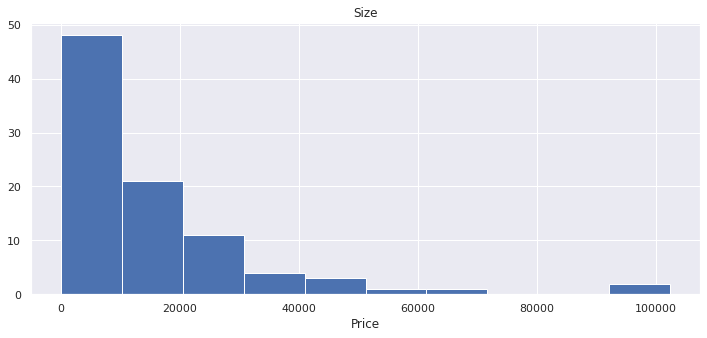

In [ ]:
#creating histogram of 'Sentiment_Subjectivity' using matplotlib.
plt.figure(figsize=(12,5))
plt.xlabel("Price")
plt.title("Size")
plt.hist(price_size_paid_df[price_size_paid_df['Size'].notnull()]['Size']) #using histogram to get get the distribution of sentiment_subjectivity
plt.show()

Investigate App Pricing Trend across Categories

-----

Text(0.5, 1.0, 'App Pricing Trend across Categories')

<Figure size 720x360 with 0 Axes>

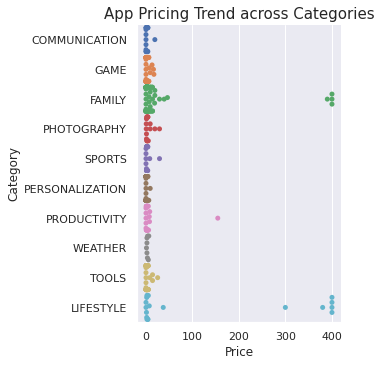

In [ ]:
top_categories = paid_app_df[paid_app_df.Category.isin(['GAME', 'COMMUNICATION', 'LIFESTYLE', 'SPORTS', 'FAMILY', 'PHOTOGRAPHY',
                                 'PERSONALIZATION','SPORTS','COMMUNICATION','TOOLS','PRODUCTIVITY','WEATHER'])]
                                                        

plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.catplot(x="Price", y="Category", kind="swarm", data=top_categories)
plt.title('App Pricing Trend across Categories',size = 15)

# **Android Version Analysis**

-----

## Identify Most Preferred Android Version - Successful FREE Apps

In [ ]:
adr_free_df = free_app_df.groupby('Android_Ver')['App'].count().reset_index().sort_values(by = ['App'], axis=0, ascending=[False], inplace=False).head(5)
adr_free_df

,Android_Ver,App
17,4.1 and up,2084
15,4.0.3 and up,1311
13,4.0 and up,1192
32,Varies with device,928
20,4.4 and up,781


## Identify Most Preferred Android Version - Successful PAID Apps

In [ ]:
adr_paid_df = paid_app_df.groupby('Android_Ver')['App'].count().reset_index().sort_values(by = ['App'], axis=0, ascending=[False], inplace=False).head(5)
adr_paid_df

,Android_Ver,App
13,4.1 and up,123
11,4.0 and up,94
12,4.0.3 and up,84
6,2.3 and up,70
23,Varies with device,62


## Identify Most Preferred Current Version - Successful FREE Apps

In [ ]:
curr_free_df = free_app_df.groupby('Current_Ver')['App'].count().reset_index().sort_values(by = ['App'], axis=0, ascending=[False], inplace=False).head(5)
curr_free_df

,Current_Ver,App
2637,Varies with device,990
106,1.0,734
258,1.1,226
398,1.2,154
964,2.0,140


## Identify Most Preferred Current Version - Successful PAID Apps

In [ ]:
curr_paid_df = paid_app_df.groupby('Current_Ver')['App'].count().reset_index().sort_values(by = ['App'], axis=0, ascending=[False], inplace=False).head(5)
curr_paid_df

,Current_Ver,App
11,1.0,70
335,Varies with device,64
49,1.1,34
72,1.2,22
12,1.0.0,19


## **Current Version Analysis**

-----

## **Current Ver & Size Relation** - FREE Apps

In [ ]:
curr_size_free_df = free_app_df.groupby('Current_Ver')['Size'].mean().reset_index().sort_values(by = ['Current_Ver'], axis=0, ascending=[False], inplace=False).head(25)
curr_size_free_df

,Current_Ver,Size
2697,version 0.994,23552.0
2696,v8[1.0.10],61440.0
2695,v8.0.1.8.0629.1,7680.0
2694,v7.0.9.1.0526.1_06_0704,17408.0
2693,v7.0.7.1.0625.1_06_0629,7782.0
2692,v7.0.02.3.0516.1_06_0713,15360.0
2691,v67_slk3.0_20180115_01,7987.0
2690,v6.7.14,21504.0
2689,v6.6.0,21504.0
2688,v6.1,2355.0


In [ ]:
fig = px.scatter(curr_size_free_df, x="Current_Ver", y="Size", color="Size",
                 title="String 'size' values mean discrete colors")
fig.show()

## **Current Ver & Size Relation** - PAID Apps

In [ ]:
curr_size_paid_df = paid_app_df.groupby('Current_Ver')['Size'].mean().reset_index().sort_values(by = ['Current_Ver'], axis=0, ascending=[False], inplace=False).head(25)
curr_size_paid_df

,Current_Ver,Size
341,v3,11264.00000
340,v2018.May.15.14,12288.00000
339,v2018.Apr.12.16,2150.00000
338,v2017.Dec.01.19,16384.00000
337,r2.5.0.3a,12288.00000
336,iu4,9830.00000
335,Varies with device,12027.40625
334,Pro 1.1.4.1,6758.00000
333,Paid-9.4.1.3,35840.00000
332,MONEY,40960.00000


In [ ]:
#using plotly to describe rating vs year distribution 
fig = px.bar(curr_size_paid_df, x='Current_Ver',y='Size',title='Ratings vs Year',color='Current_Ver',width=800, height=600)
fig.show()

## There is no Relation and consistancy in Current version, hence no relation can be established

## **Android Version & Rating** Relation - FREE Apps

-----

In [ ]:
adr_rate_free_df = free_app_df.groupby('Android_Ver')['Rating'].mean().reset_index().sort_values(by = ['Android_Ver'], axis=0, ascending=[False], inplace=False)
adr_rate_free_df

,Android_Ver,Rating
32,Varies with device,4.240194
31,8.0 and up,4.040000
30,7.1 and up,3.966667
29,7.0 and up,4.024138
28,7.0 - 7.1.1,4.500000
27,6.0 and up,3.971429
26,5.1 and up,4.315789
25,5.0 and up,4.152273
24,5.0 - 8.0,4.500000
23,5.0 - 7.1.1,4.300000


In [ ]:
fig = px.scatter(adr_rate_free_df, x="Android_Ver", y="Rating", color="Rating",
                 title="String 'size' values mean discrete colors")
fig.show()

## **Android Version & Rating** Relation - PAID Apps

-----

In [ ]:
adr_rate_paid_df = paid_app_df.groupby('Android_Ver')['Rating'].mean()
adr_rate_paid_df

Android_Ver
1.5 and up            4.183333
1.6 and up            4.143590
2.0 and up            4.366667
2.0.1 and up          4.380000
2.1 and up            4.134615
2.2 and up            4.243478
2.3 and up            4.270000
2.3.3 and up          3.940000
3.0 and up            4.246667
3.1 and up            4.300000
3.2 and up            4.212500
4.0 and up            4.265957
4.0.3 and up          4.266667
4.1 and up            4.333333
4.2 and up            4.238095
4.3 and up            4.128571
4.4 and up            4.302703
4.4W and up           4.450000
5.0 and up            4.378571
5.1 and up            4.466667
6.0 and up            4.140000
7.0 and up            4.330769
8.0 and up            4.600000
Varies with device    4.427419
Name: Rating, dtype: float64

Text(0, 0.5, 'Android_Ver')

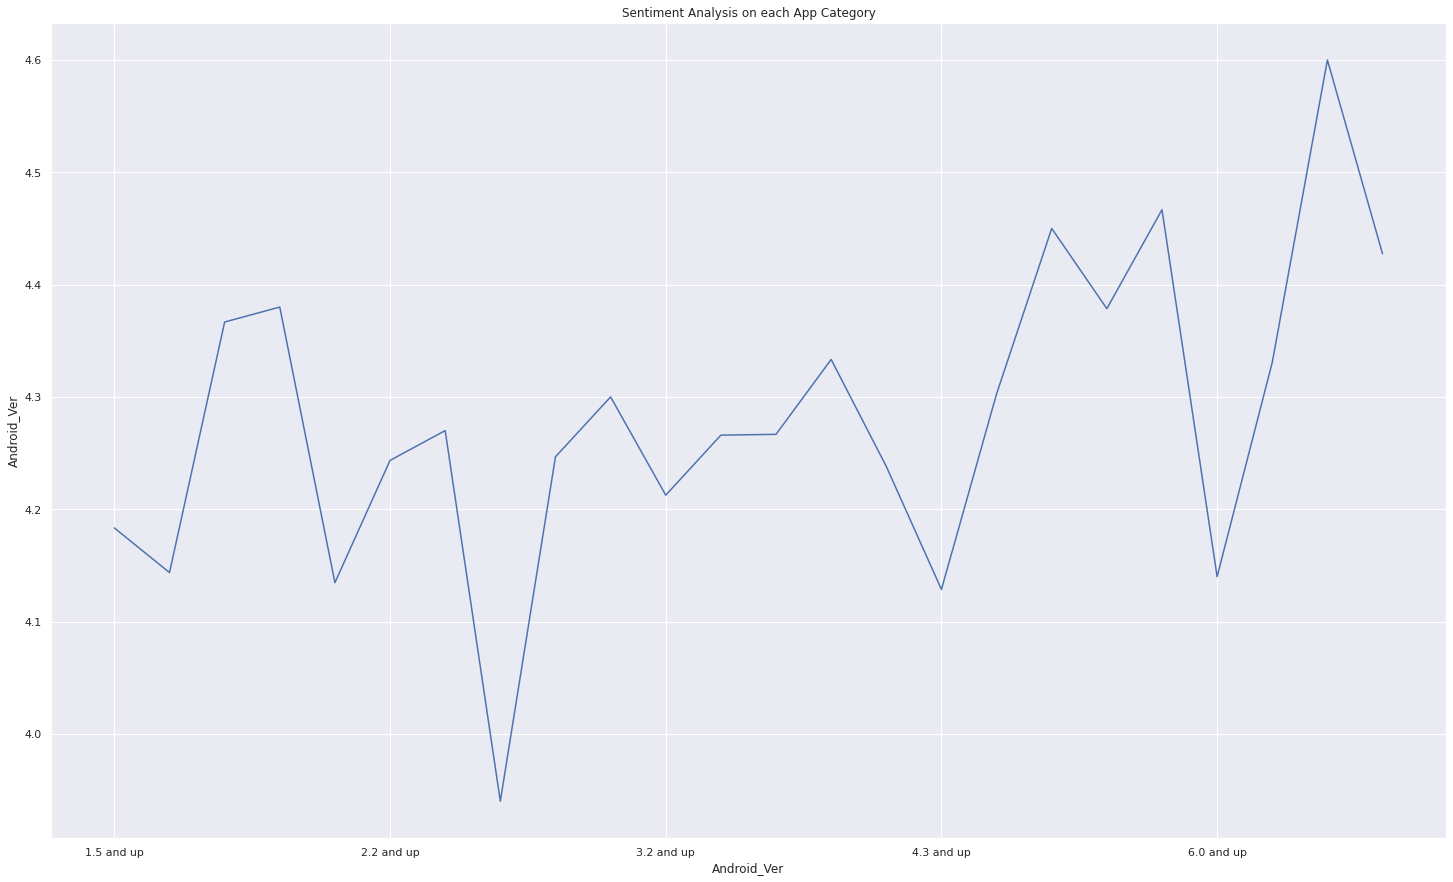

In [ ]:
adr_rate_paid_df.plot()
plt.rcParams['figure.figsize'] = (20, 5)
plt.title('Sentiment Analysis on each App Category')
plt.ylabel('Android_Ver')

## **Android Version & Reviews Relation** - FREE Apps

-----

In [ ]:
adr_rev_free_df = free_app_df.groupby('Android_Ver')['Reviews'].mean()
adr_rev_free_df

Android_Ver
1.0 and up            2.645000e+02
1.5 and up            3.131807e+04
1.6 and up            7.668390e+03
2.0 and up            5.027338e+04
2.0.1 and up          5.527865e+05
2.1 and up            8.910119e+04
2.2 - 7.1.1           4.000000e+00
2.2 and up            1.084768e+04
2.3 and up            8.089864e+04
2.3.3 and up          7.256251e+04
3.0 and up            1.188220e+05
3.1 and up            1.669721e+05
3.2 and up            6.940143e+03
4.0 and up            1.515817e+05
4.0.3 - 7.1.1         1.149245e+05
4.0.3 and up          1.721125e+05
4.1 - 7.1.1           8.572150e+05
4.1 and up            2.166371e+05
4.2 and up            1.119643e+05
4.3 and up            9.812123e+04
4.4 and up            1.207032e+05
4.4W and up           3.988889e+01
5.0 - 6.0             3.140000e+02
5.0 - 7.1.1           1.000000e+00
5.0 - 8.0             1.544385e+05
5.0 and up            5.613600e+04
5.1 and up            5.468684e+03
6.0 and up            1.986835e+04
7.0 - 7.

Text(0, 0.5, 'Android_Ver')

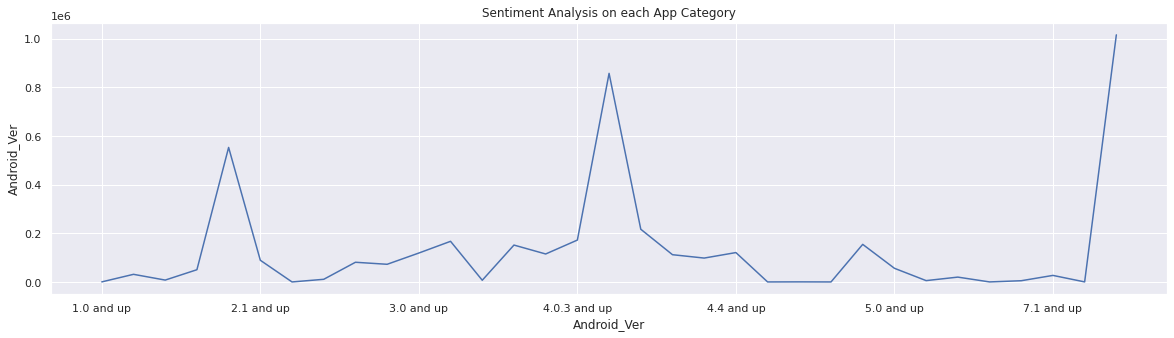

In [ ]:
adr_rev_free_df.plot()
plt.rcParams['figure.figsize'] = (20, 5)
plt.title('Sentiment Analysis on each App Category')
plt.ylabel('Android_Ver')

## **Android Version & Reviews Relation** - PAID Apps

-----

In [ ]:
adr_rev_paid_df = paid_app_df.groupby('Android_Ver')['Reviews'].mean().reset_index().sort_values(by = ['Android_Ver'], axis=0, ascending=[False], inplace=False)
adr_rev_paid_df

,Android_Ver,Reviews
23,Varies with device,45578.354839
22,8.0 and up,5.000000
21,7.0 and up,55.000000
20,6.0 and up,15.800000
19,5.1 and up,771.000000
18,5.0 and up,2181.071429
17,4.4W and up,108.000000
16,4.4 and up,6129.324324
15,4.3 and up,1407.428571
14,4.2 and up,10219.095238


In [ ]:
#using plotly to describe rating vs year distribution 
fig = px.bar(adr_rev_paid_df, x='Android_Ver',y='Reviews',title='Ratings vs Year',color='Android_Ver',width=800, height=600)
fig.show()

# Investigate relation of Android Version & App Size - FREE Apps

-----

In [ ]:
adr_size_free_df = free_app_df.groupby('Android_Ver')['Size'].mean().reset_index().sort_values(by = ['Android_Ver'], axis=0, ascending=[False], inplace=False)
adr_size_free_df

,Android_Ver,Size
32,Varies with device,12694.065733
31,8.0 and up,23756.600000
30,7.1 and up,25944.000000
29,7.0 and up,26517.931034
28,7.0 - 7.1.1,7270.000000
27,6.0 and up,19771.408163
26,5.1 and up,24090.842105
25,5.0 and up,23540.243802
24,5.0 - 8.0,24371.000000
23,5.0 - 7.1.1,8601.000000


In [ ]:
fig5=px.bar(adr_size_free_df,x='Android_Ver',y='Size',title='Sentiment analysis of each Rating',width=800,height=600)
fig5.show()

In [ ]:
# Top 10 Android Versions

adr_size_paid_df = paid_app_df.groupby('Android_Ver')['Size'].mean()
adr_size_paid_df

Android_Ver
1.5 and up             9982.166667
1.6 and up             4831.948718
2.0 and up            10424.166667
2.0.1 and up          27779.000000
2.1 and up             2969.192308
2.2 and up            13007.608696
2.3 and up            23368.771429
2.3.3 and up          22865.033333
3.0 and up            13169.466667
3.1 and up              172.000000
3.2 and up            17318.250000
4.0 and up            17781.180851
4.0.3 and up          22899.678571
4.1 and up            26951.430894
4.2 and up            25248.761905
4.3 and up            11110.071429
4.4 and up            24489.297297
4.4W and up            1843.000000
5.0 and up            19215.571429
5.1 and up            23997.666667
6.0 and up            16895.800000
7.0 and up            19342.846154
8.0 and up             4608.000000
Varies with device    12222.161290
Name: Size, dtype: float64

In [ ]:
#Using scatter plot from Plotly to get more accurate result
fig4=px.scatter(adr_size_paid_df,y='Size',color='Size',title='Average Rating of each Genres',width=800, height=600)
fig4.show()

# Investigate Android Version & Proce Relation

-----

In [ ]:
# Top 10 Android Versions

adr_prc_paid_df = paid_app_df.groupby('Android_Ver')['Price'].mean().reset_index().sort_values(by = ['Android_Ver'], axis=0, ascending=[False], inplace=False)
adr_prc_paid_df

,Android_Ver,Price
23,Varies with device,4.108387
22,8.0 and up,1.490000
21,7.0 and up,32.490000
20,6.0 and up,1.990000
19,5.1 and up,3.990000
18,5.0 and up,4.097143
17,4.4W and up,10.990000
16,4.4 and up,36.152162
15,4.3 and up,23.295000
14,4.2 and up,43.533810


In [ ]:
fig5=px.bar(adr_prc_paid_df,x='Android_Ver',y='Price',title='Sentiment analysis of each Rating',width=800,height=600)
fig5.show()

# General distribution of Rating - Free Apps

-----

In [ ]:
## general distribution of rating
rating_distribution = [go.Histogram(
        x = free_app_df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(free_app_df['Rating']))
plotly.offline.iplot(rating_distribution, filename='Overall_Free_App_Rating_Distribution')

Average app rating =  4.185616438356165


# General Distribution of Rating - Paid Apps

-----

In [ ]:
## General distribution of Rating chart

rating_distribution = [go.Histogram(
        x = paid_app_df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average App Rating = ', np.mean(paid_app_df['Rating']))
plotly.offline.iplot(rating_distribution, filename='Overall_Paid_App_Rating_Distribution')

Average App Rating =  4.269761273209549


# **Reviews & Rating Relation** - FREE Apps
-----

In [ ]:
rev_rate_free_df = abv_avg_free_app_data_df.groupby('Reviews')['Rating'].mean().reset_index().sort_values(by = ['Rating'], axis=0, ascending=[False], inplace=False)
rev_rate_free_df

,Reviews,Rating
52,272172.0,4.9
432,922752.0,4.9
207,445756.0,4.8
513,1264084.0,4.8
559,1506783.0,4.8
...,...,...
440,951435.0,4.2
242,501498.0,4.2
254,521081.0,4.2
255,522018.0,4.2


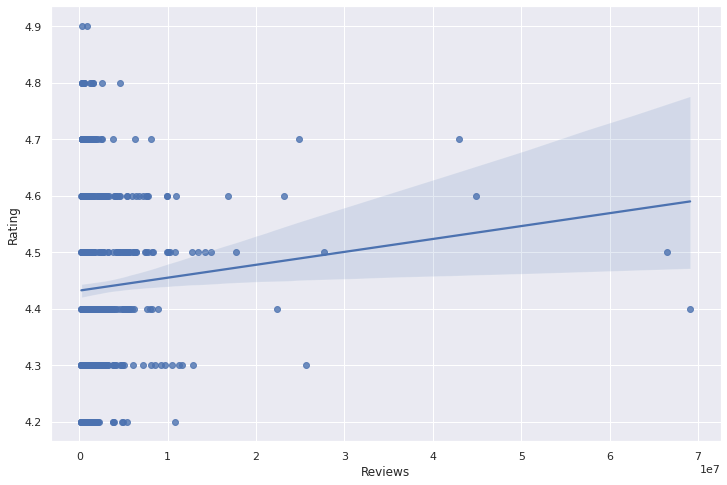

In [ ]:
# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                  #Giving height and width to the graph
#rev_rate_free_df['Reviews']=rev_rate_free_df['Reviews'].astype(int)     #convert year data to integer type
sns.regplot(data=rev_rate_free_df,x='Reviews',y='Rating')

# **Reviews & Rating Relation** - PAID Apps
-----

In [ ]:
rev_rate_paid_df = abv_avg_paid_app_data_df.groupby('Reviews')['Rating'].mean() #.reset_index().sort_values(by = ['Rating'], axis=0, ascending=[False], inplace=False)
rev_rate_paid_df

Reviews
9394.0       4.6
9699.0       4.5
10295.0      4.8
10795.0      4.6
11023.0      4.4
            ... 
188740.0     4.7
190086.0     4.6
348962.0     4.4
408292.0     4.6
2375336.0    4.5
Name: Rating, Length: 73, dtype: float64

Text(0, 0.5, 'Reviews')

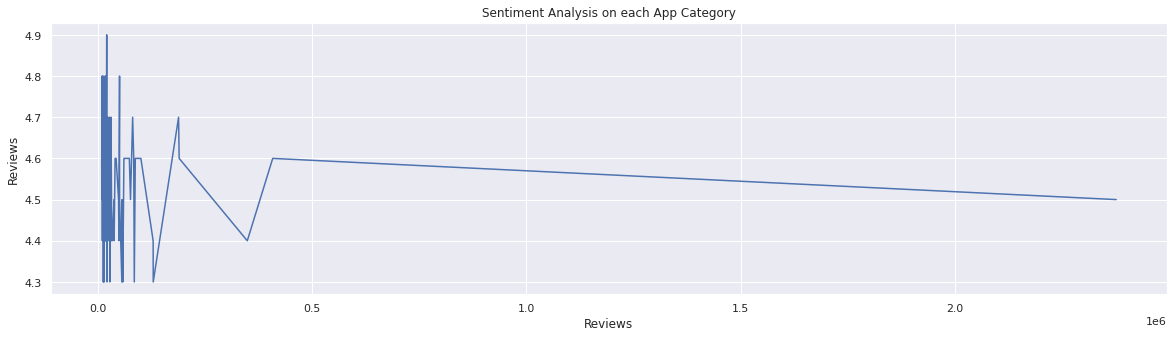

In [ ]:
rev_rate_paid_df.plot()
plt.rcParams['figure.figsize'] = (20, 5)
plt.title('Sentiment Analysis on each App Category')
plt.ylabel('Reviews')

# **Reviews & Size Relationship** - FREE Apps
-----

In [ ]:
rev_size_free_df = abv_avg_free_app_data_df.groupby('Reviews')['Size'].mean().reset_index().sort_values(by = ['Size'], axis=0, ascending=[False], inplace=False).head(50)
rev_size_free_df

,Reviews,Size
726,6071542.0,102400.0
686,4218587.0,102400.0
525,1327269.0,101376.0
23,253115.0,101376.0
750,8219586.0,101376.0
190,417197.0,101376.0
505,1226514.0,101376.0
204,438911.0,101376.0
757,9876369.0,101376.0
210,452589.0,101376.0


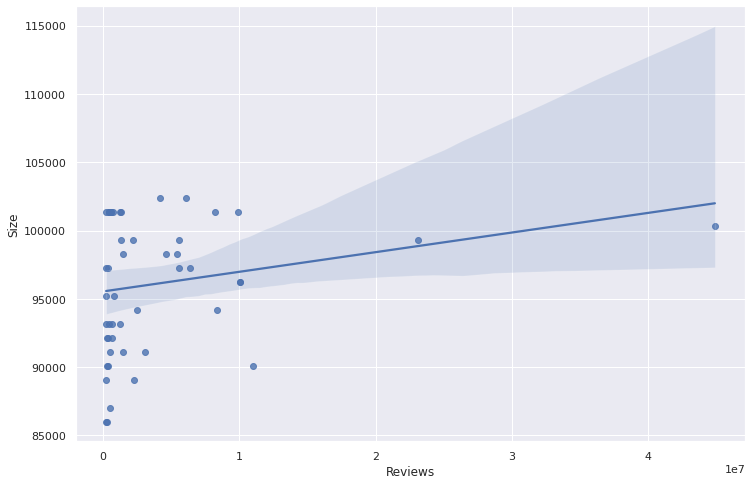

In [ ]:
# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                      #Giving height and width to the graph
rev_size_free_df['Reviews']=rev_size_free_df['Reviews'].astype(int)             #convert year data to integer type
sns.regplot(data=rev_size_free_df,x='Reviews',y='Size')

# **Reviews & Size Relationship** - PAID Apps
-----

In [ ]:
rev_size_paid_df = abv_avg_paid_app_data_df.groupby('Reviews')['Size'].mean().reset_index().sort_values(by = ['Size'], axis=0, ascending=[False], inplace=False).head(50)
rev_size_paid_df

,Reviews,Size
48,38419.0,102400.0
45,32496.0,101376.0
17,16162.0,101376.0
10,13604.0,98304.0
69,190086.0,96256.0
18,16851.0,82944.0
66,129409.0,74752.0
3,10795.0,70656.0
68,188740.0,70656.0
24,18652.0,64512.0


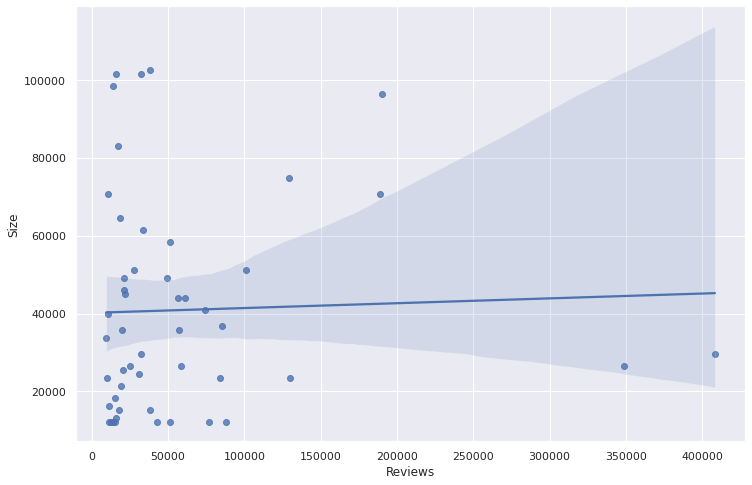

In [ ]:
# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                      #Giving height and width to the graph
rev_size_paid_df['Reviews']=rev_size_paid_df['Reviews'].astype(int)             #convert year data to integer type
sns.regplot(data=rev_size_paid_df,x='Reviews',y='Size')

# **Rating & Price Relationship** - PAID Apps
-----

In [ ]:
price_rate_paid_df = paid_app_df.groupby('Rating')['Price'].mean().reset_index().sort_values(by = ['Rating'], axis=0, ascending=[False], inplace=False)
price_rate_paid_df

,Rating,Price
31,5.0,3.643929
30,4.9,3.156667
29,4.8,4.046111
28,4.7,4.508400
27,4.6,4.861053
26,4.5,4.563182
25,4.4,9.428529
24,4.3,15.371343
23,4.2,4.766786
22,4.1,31.228333


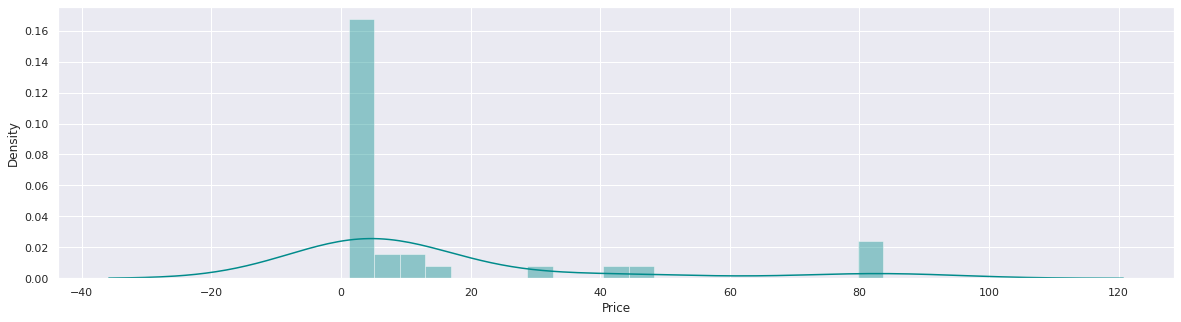

In [ ]:
rate_price_apps = price_rate_paid_df['Price'].dropna()
ax = sns.distplot(rate_price_apps, color="darkcyan")

## **Rating & Last Update Relation** - FREE Apps

-----

In [ ]:
updt_rate_free_df = free_app_df.groupby('LastUpdated_Year')['Rating'].mean().reset_index().sort_values(by = ['LastUpdated_Year'], axis=0, ascending=[False], inplace=False)
updt_rate_free_df

,LastUpdated_Year,Rating
8,2018,4.228380
7,2017,4.125493
6,2016,4.078374
5,2015,4.094837
4,2014,3.992617
3,2013,4.030000
2,2012,3.942857
1,2011,3.875000
0,2010,4.200000


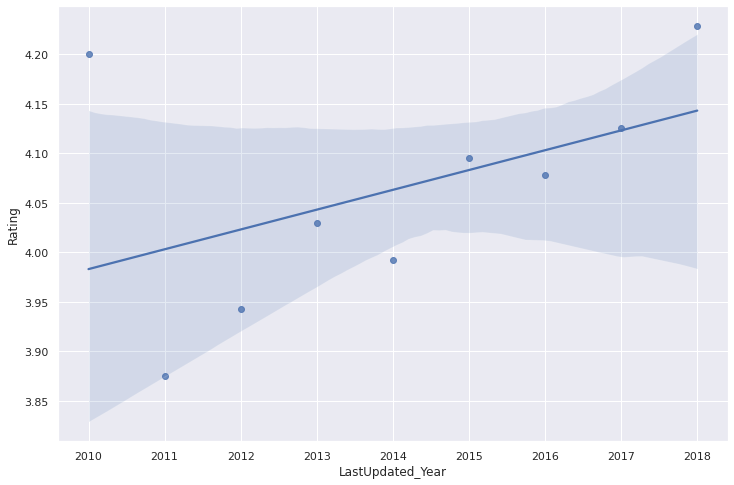

In [ ]:
# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                  #Giving height and width to the graph
updt_rate_free_df['LastUpdated_Year']=updt_rate_free_df['LastUpdated_Year'].astype(int)     #convert year data to integer type
sns.regplot(data=updt_rate_free_df,x='LastUpdated_Year',y='Rating') 

## **Rating & Last Update Relation** - PAID Apps

-----

In [ ]:
updt_rate_paid_df = paid_app_df.groupby('LastUpdated_Year')['Rating'].mean().reset_index().sort_values(by = ['LastUpdated_Year'], axis=0, ascending=[False], inplace=False)
updt_rate_paid_df

,LastUpdated_Year,Rating
7,2018,4.380864
6,2017,4.197059
5,2016,4.167778
4,2015,4.127500
3,2014,4.244444
2,2013,4.314286
1,2012,3.640000
0,2011,4.333333


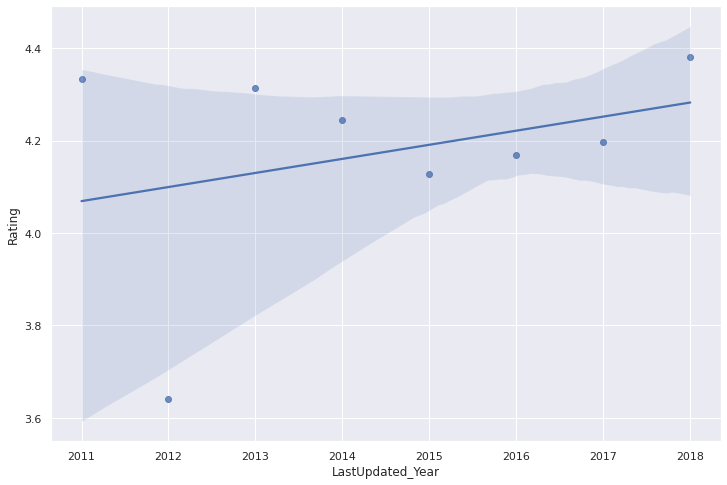

In [ ]:
# Lets understand the trend with hep of visualization

fig=plt.figure(figsize=(12,8))                                                  #Giving height and width to the graph
updt_rate_paid_df['LastUpdated_Year']=updt_rate_paid_df['LastUpdated_Year'].astype(int)     #convert year data to integer type
sns.regplot(data=updt_rate_paid_df,x='LastUpdated_Year',y='Rating') 

# **SENTIMENT Analysis**

-----

# Free & Paid Apps - Sentiment DataFrames

-----

In [ ]:
# Let's make separate DataFrames for Free Apps and Paid Apps

# Free App Sentiment Dataframe :

free_app_sent_df = merg_sent_df[merg_sent_df['Type'] == 'Free']

# Paid App Sentiment Dataframe :

paid_app_sent_df = merg_sent_df[merg_sent_df['Type'] == 'Paid']

## Correlation of Reviews Data Parameters - Free Apps
-----

In [ ]:
# Created DataFrame for correlation between all important numerical parameters - Successful Paid Apps

sent_corr_df =free_app_sent_df.corr()
sent_corr_df

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.076216,0.093424,0.020310,NaN,-0.073318,0.114817,0.260996,0.093635,0.068607
Reviews,0.076216,1.000000,0.190576,0.563869,NaN,-0.086471,0.059010,0.078803,-0.079971,-0.009165
Size,0.093424,0.190576,1.000000,0.040249,NaN,-0.039789,0.012527,0.177521,-0.119121,0.013291
Installs,0.020310,0.563869,0.040249,1.000000,NaN,-0.158187,0.093278,0.091562,-0.057626,-0.006110
Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastUpdated_Day,-0.073318,-0.086471,-0.039789,-0.158187,NaN,1.000000,-0.176179,-0.021316,0.002811,-0.006201
LastUpdated_Month,0.114817,0.059010,0.012527,0.093278,NaN,-0.176179,1.000000,-0.030068,0.001440,-0.016528
LastUpdated_Year,0.260996,0.078803,0.177521,0.091562,NaN,-0.021316,-0.030068,1.000000,0.005743,-0.007938
Sentiment_Polarity,0.093635,-0.079971,-0.119121,-0.057626,NaN,0.002811,0.001440,0.005743,1.000000,0.258569
Sentiment_Subjectivity,0.068607,-0.009165,0.013291,-0.006110,NaN,-0.006201,-0.016528,-0.007938,0.258569,1.000000


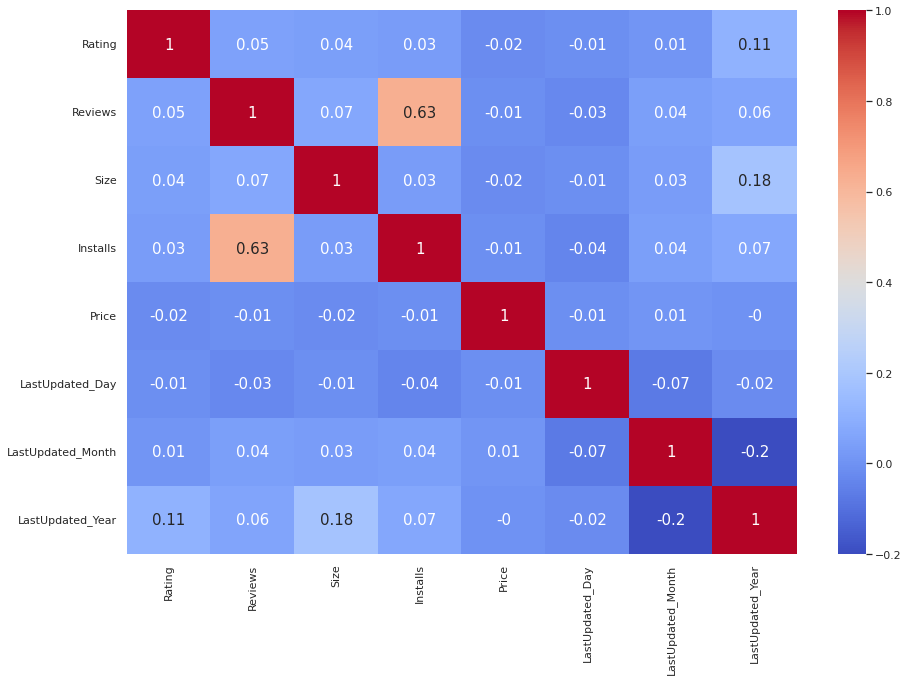

In [ ]:
# plotting correlation heatmap using seaborn
plt.figure(figsize=(15,10))
corr = round(ps_data_df.corr(),2)
sns.heatmap(corr, annot= True, cmap = 'coolwarm',annot_kws={'size':15})

**INFERENCE :** 

1. Here we can see strong correlation of Installs & Rating. Other parameters are not showing any significant correlation with each other. 

2. As per some normal incremental correlation coefficient no. like 0.11 (LastUpdate & Rating), 0.18 (LastUpdate & Size) etc. may show us some slight trends over a period.

3. We will analyse the same in detail to understand their impact on App performance.

Investigating Free & Paid Apps - Sentiment Polarity Distribution

-----

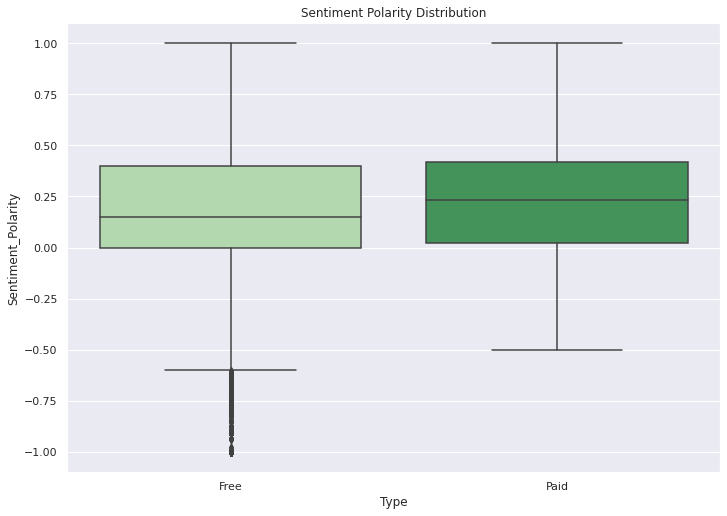

In [ ]:
## sentiment polarity and free/paid apps
#sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merg_sent_df, palette='Greens')
title = ax.set_title('Sentiment Polarity Distribution')

**INFERENCE -**

1. Here this Box Plot gives us five important numbers related to relation of Sentiment Polarity in Free & Paid Apps

2. Free apps have higher sentiment polarity parameters with respect to Paid Apps
(Median, Max, Inter Quartile Ranges etc)

3. Here we understand that customers sentiment are stable and better in terms of Paid Apps. That might be due to Paid Apps are providing good services than the Free Apps

4. Here we can see that Free Apps sentiment polarity is slightly negatively skewed as campared to Paid Apps

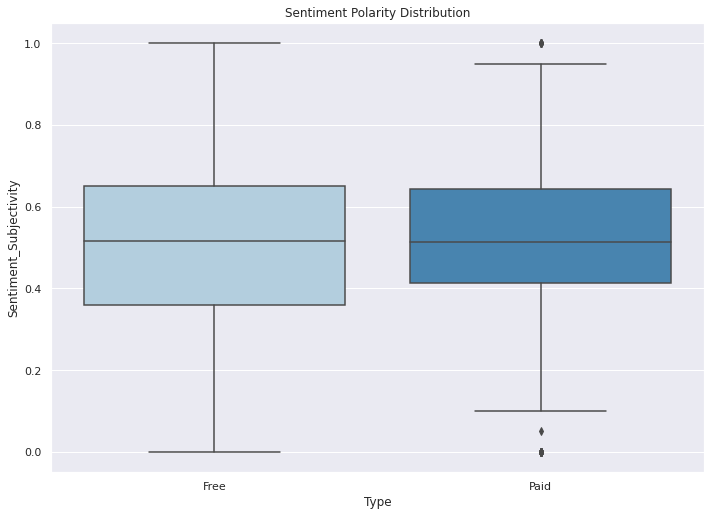

In [ ]:
## sentiment polarity and free/paid apps
#sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Subjectivity', data=merg_sent_df, palette='Blues')
title = ax.set_title('Sentiment Polarity Distribution')

INFERENCE -

1. Here this Sentiment Subjectivity Box Plot also giving us same sentiment trend like polarity

2. Here also, we can confirm that customers sentiment subjectivity i.e. intensity of emotions while expressing their views is stable and better in terms of Paid Apps. That might be due to Paid Apps are providing good services than the Free Apps.

4. We can also see that Free Apps sentiment subjectivity is slightly negatively skewed as campared to Paid Apps

## **App Type wise "Positivity %"**
-----

In [ ]:
free_paid_pivot = pd.pivot_table(merg_sent_df, values='Sentiment_Polarity', index='Type', columns='Sentiment',aggfunc='mean')

free_paid_pivot['Percentage'] = free_paid_pivot['Negative'] / free_paid_pivot['Positive'] *100
free_paid_pivot['Abs_Perc'] = 100 - (free_paid_pivot['Percentage'].abs())
free_paid_pivot

Sentiment,Negative,Neutral,Positive,Percentage,Abs_Perc
Type,,,,,
Free,-0.255076,0.0,0.370602,-68.827491,31.172509
Paid,-0.181998,0.0,0.327821,-55.517284,44.482716


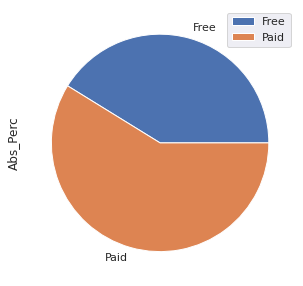

In [ ]:
plot = free_paid_pivot.plot.pie(y='Abs_Perc', figsize=(5, 5))

INFERENCE -

1. In this pie chart we can see that as a whole peopple are positive about Free & Paid both the apps

2. People are slightly conservative while giving their reviews about Apps

3. We can also see that overall positivity of Paid Apps is more that Free Apps

4. This means people are findind Paid App service better than Free Apps

## **App Type wise "Subjectivity %"**
-----

In [ ]:
free_paid_pivot1 = pd.pivot_table(merg_sent_df, values='Sentiment_Subjectivity', index='Type', columns='Sentiment',aggfunc='mean')
free_paid_pivot1

Sentiment,Negative,Neutral,Positive
Type,,,
Free,0.534427,0.081025,0.566760
Paid,0.496066,0.044541,0.554406


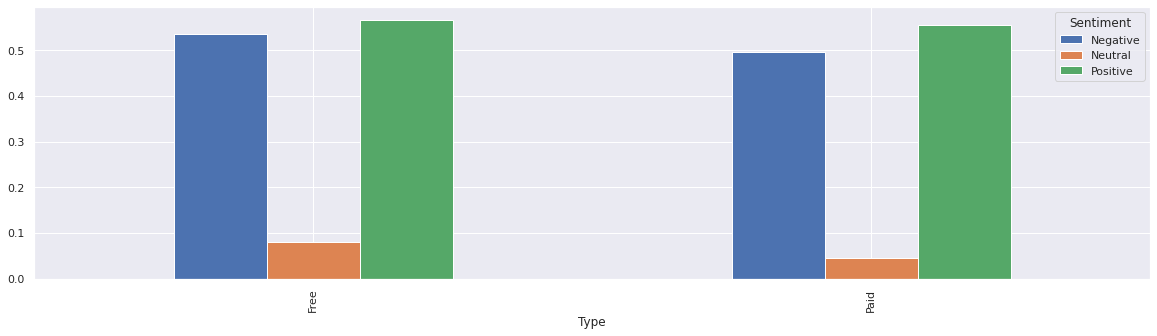

In [ ]:
free_paid_pivot1.plot.bar()

INFERENCE -

1. In above chart we can see positive bar is higher than negative bar, people are overall positive about Free & Paid Apps

2. Very few people are neutral, most of the people are vocal about their experiences

3. Overall Positive subjectivity is more 



## **Content Rating wise "Subjectivity %"** - FREE Apps
-----

In [ ]:
free_cont_rate_pivot = pd.pivot_table(free_app_sent_df, values='Sentiment_Subjectivity', index='Content_Rating', columns='Sentiment',aggfunc='mean')
free_cont_rate_pivot

Sentiment,Negative,Neutral,Positive
Content_Rating,,,
Adults only 18+,0.537037,0.000000,0.575843
Everyone,0.536460,0.079112,0.568949
Everyone 10+,0.512369,0.104467,0.539068
Mature 17+,0.566959,0.073250,0.590501
Teen,0.516495,0.096069,0.549770


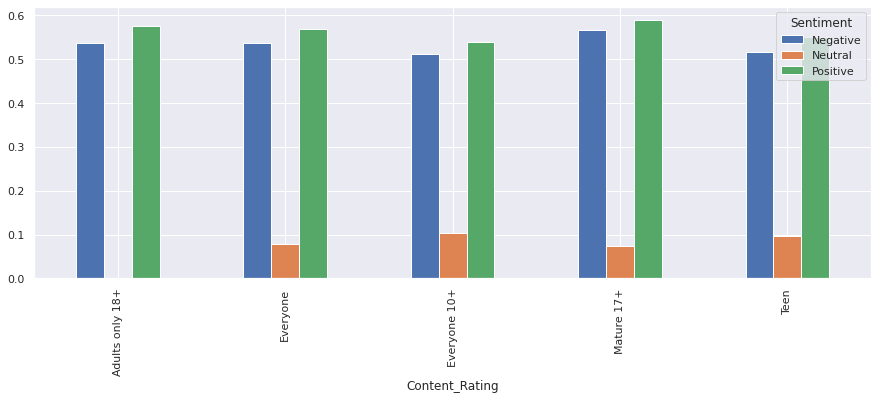

In [ ]:
free_cont_rate_pivot.plot.bar(figsize=(15,5), width=0.5)
plt.show()

INFERENCE -

1. Here in Free Apps case we can see that highest negative & positive emotions are coming out from Mature 17+ category followed by Adult only 18+ and Everyone category

2. In these categories people are expressing their views very emtionally about apps

2. Most neutral category in terms of emotions is Everyone 10+ category


## **Content Rating wise "Subjectivity %"** - PAID Apps
-----

In [ ]:
paid_cont_rate_pivot = pd.pivot_table(paid_app_sent_df, values='Sentiment_Subjectivity', index='Content_Rating', columns='Sentiment',aggfunc='mean')
paid_cont_rate_pivot

Sentiment,Negative,Neutral,Positive
Content_Rating,,,
Everyone,0.502010,0.044541,0.561644
Mature 17+,0.482348,NaN,0.528040
Teen,0.442716,NaN,NaN


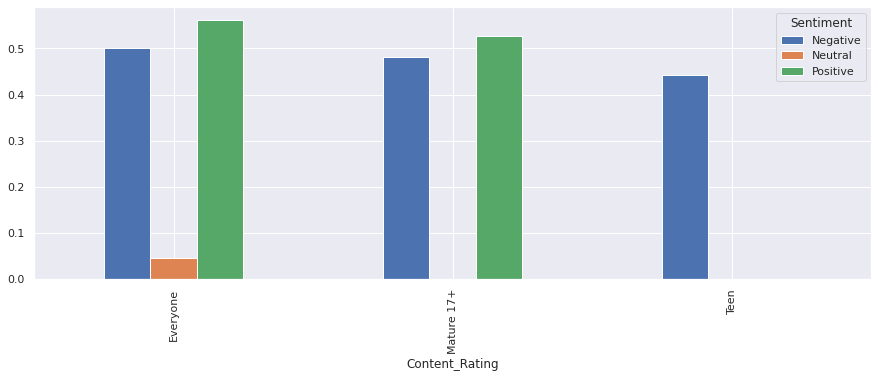

In [ ]:
paid_cont_rate_pivot.plot.bar(figsize=(15,5), width=0.5)
plt.show()

INFERENCE -

1. Here in Paid Apps case we can see that highest positive emotions are coming out from Everyone category followed by Mature 17+ category

2. In these categories people are expressing their views very emtionally about apps

2. In teens category, people are expressing only negative  emotions. They look conservative in appreciating the content.

# **Size & Sentiment Analysis**
-----

Investigate Sentiment Polarity & Subjectivity Trend -  FREE Apps

-----

In [ ]:
size_sent_free_pivot = pd.pivot_table(free_app_sent_df, values=['Sentiment_Polarity','Sentiment_Subjectivity'], index='Size',aggfunc='mean')
size_sent_free_pivot

,Sentiment_Polarity,Sentiment_Subjectivity
Size,,
8,0.281420,0.484535
118,0.350000,0.600000
232,0.106241,0.538079
292,0.193917,0.488203
624,0.065829,0.672514
...,...,...
97280,0.281419,0.556830
98304,0.149045,0.503280
99328,0.024929,0.516270


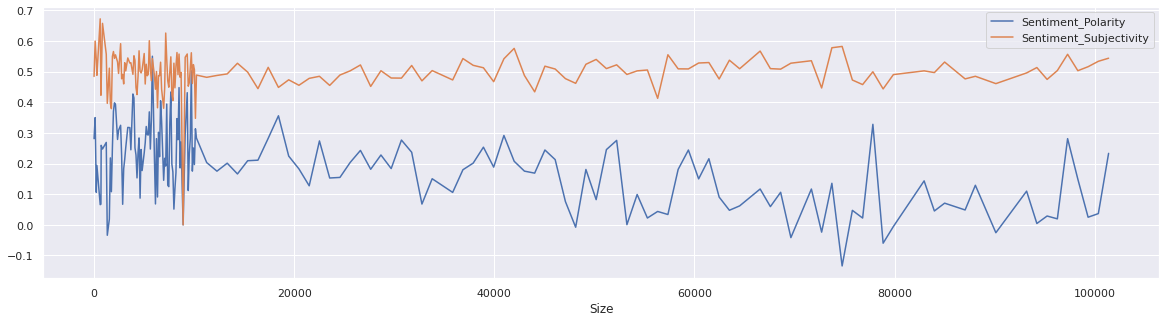

In [ ]:
size_sent_free_pivot.plot.line()

INFERENCE -

1. For Free Apps, increase in size does not have significant impact on subjectivity
2. But Sentiment Polarity is showing declining trend with increase in size

Investigate Sentiment Polarity & Subjectivity Trend -  PAID Apps

-----

In [ ]:
size_sent_paid_pivot = pd.pivot_table(paid_app_sent_df, values=['Sentiment_Polarity','Sentiment_Subjectivity'], index='Size',aggfunc='mean')
size_sent_paid_pivot

,Sentiment_Polarity,Sentiment_Subjectivity
Size,,
6041,0.184987,0.410125
9728,0.180237,0.532672
14336,0.179418,0.501691
15360,0.064467,0.493330
19456,0.363627,0.568469
25600,0.386179,0.475312
26624,0.181818,0.513802
43008,0.225516,0.522328
47104,-0.162120,0.442716


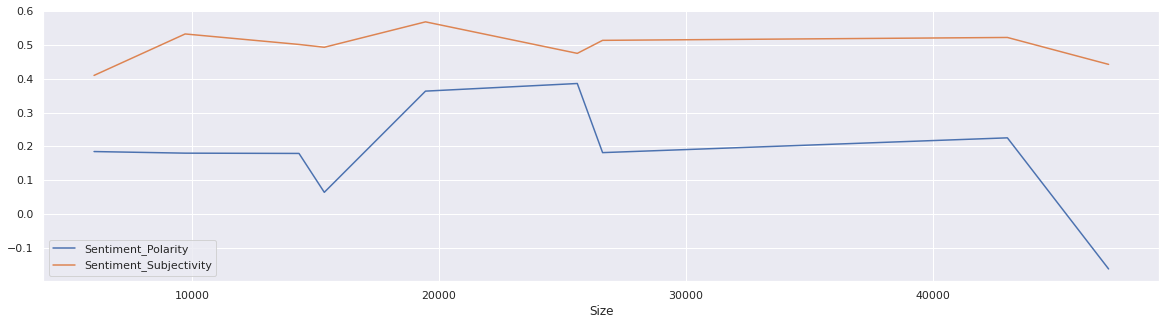

In [ ]:
size_sent_paid_pivot.plot.line()

INFERENCE -

1. For Paid Apps also, increase in size does not have significant impact on subjectivity
2. But Sentiment Polarity is showing declining trend with increase in size

Investigate Installs - Sentiment Subjectivity & Subjectivity Trend -  FREE Apps

-----

In [ ]:
install_free_pivot = pd.pivot_table(free_app_sent_df, values=['Sentiment_Polarity','Sentiment_Subjectivity'], index='Installs',aggfunc='mean')
install_free_pivot

,Sentiment_Polarity,Sentiment_Subjectivity
Installs,,
1.000000e+04,0.293793,0.520478
5.000000e+04,0.322103,0.517497
1.000000e+05,0.223133,0.497083
5.000000e+05,0.227432,0.496929
1.000000e+06,0.207633,0.489306
5.000000e+06,0.202217,0.499487
1.000000e+07,0.165228,0.494211
5.000000e+07,0.109317,0.486752
1.000000e+08,0.100404,0.489188


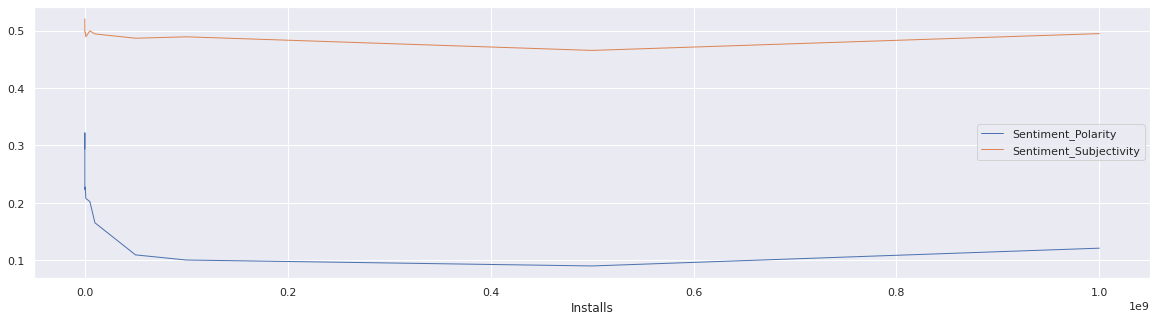

In [ ]:
chart = install_free_pivot.plot(kind='line', linewidth=1.0)

INFERENCE -

1. For Free Apps, increasing installs does not show any significant positive / negative trend for both sentiment polarity as well as sentiment subjectivity.


Investigate Installs - Sentiment Subjectivity & Subjectivity Trend -  PAID Apps

-----

In [ ]:
install_paid_pivot = pd.pivot_table(paid_app_sent_df, values=['Sentiment_Polarity','Sentiment_Subjectivity'], index='Installs',aggfunc='mean')
install_paid_pivot

,Sentiment_Polarity,Sentiment_Subjectivity
Installs,,
1000.0,0.363627,0.568469
10000.0,0.184987,0.410125
50000.0,0.242008,0.516412
100000.0,0.048282,0.489715
1000000.0,0.180512,0.507212


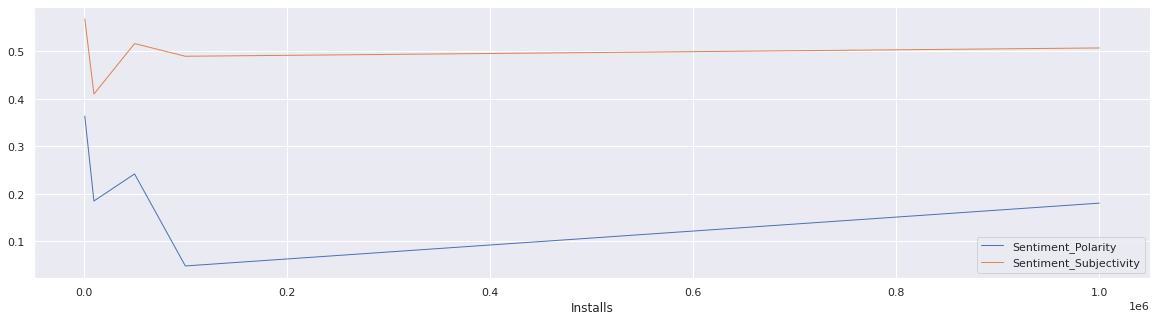

In [ ]:
chart = install_paid_pivot.plot(kind='line', linewidth=1.0)

INFERENCE -

1. For Paid Apps, increasing installs are showing slight positive trend for sentiment polarity.

2. Subjectivity is stable while increasing installs 

Rating - Sentiment Polarity & Subjectivity Relation

-----

In [ ]:
rate_sent_free_pivot = pd.pivot_table(free_app_sent_df, values=['Sentiment_Polarity','Sentiment_Subjectivity'], index='Rating',aggfunc='mean')
rate_sent_free_pivot

,Sentiment_Polarity,Sentiment_Subjectivity
Rating,,
2.6,-0.123233,0.367896
2.7,-0.087977,0.385036
3.0,-0.022033,0.392033
3.1,0.113869,0.406163
3.2,0.018577,0.331314
3.3,0.147288,0.522336
3.4,0.023895,0.442973
3.5,0.104320,0.457802
3.6,0.041122,0.454306


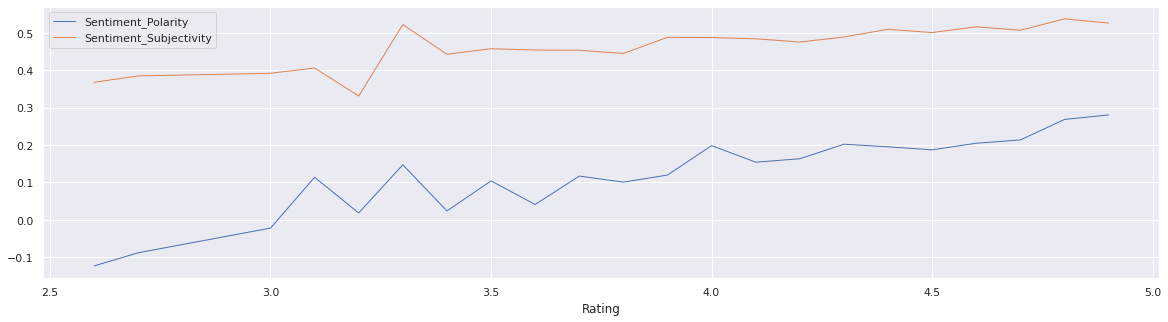

In [ ]:
chart = rate_sent_free_pivot.plot(kind='line', linewidth=1.0)

INFERENCE -

1. For Free Apps, in chart we can see rating is highly cporrelated with rating.

2. Sentiment polarity shows higher growth rate than sentiment subjectivity

In [ ]:
rate_sent_paid_pivot = pd.pivot_table(paid_app_sent_df, values=['Sentiment_Polarity','Sentiment_Subjectivity'], index='Rating',aggfunc='mean')
rate_sent_paid_pivot

,Sentiment_Polarity,Sentiment_Subjectivity
Rating,,
4.1,0.279071,0.506656
4.2,0.153803,0.497268
4.3,0.183603,0.455393
4.4,0.180237,0.532672
4.5,0.064467,0.493330
4.6,0.363627,0.568469


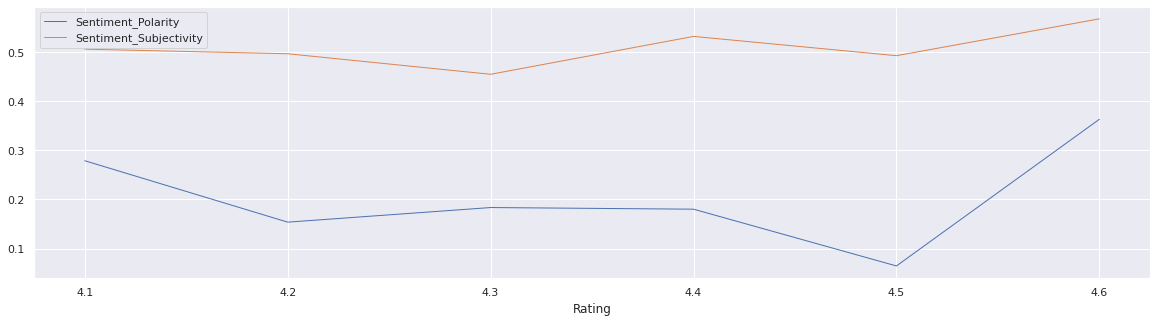

In [ ]:
chart = rate_sent_paid_pivot.plot(kind='line', linewidth=1.0)

INFERENCE -

1. For Paid Apps also, increasing rating are showing positive trend for sentiment polarity & subjectivity both.

2. Rate of polarity increase is higher than subjectivity

Update Impact of Polarity & Sentiment

-----

In [ ]:
update_sent_paid_pivot = pd.pivot_table(paid_app_sent_df, values=['Sentiment_Polarity','Sentiment_Subjectivity'], index='LastUpdated_Year',aggfunc='mean')
update_sent_paid_pivot

,Sentiment_Polarity,Sentiment_Subjectivity
LastUpdated_Year,,
2014,0.204068,0.527228
2016,0.166035,0.504487
2018,0.270825,0.501161


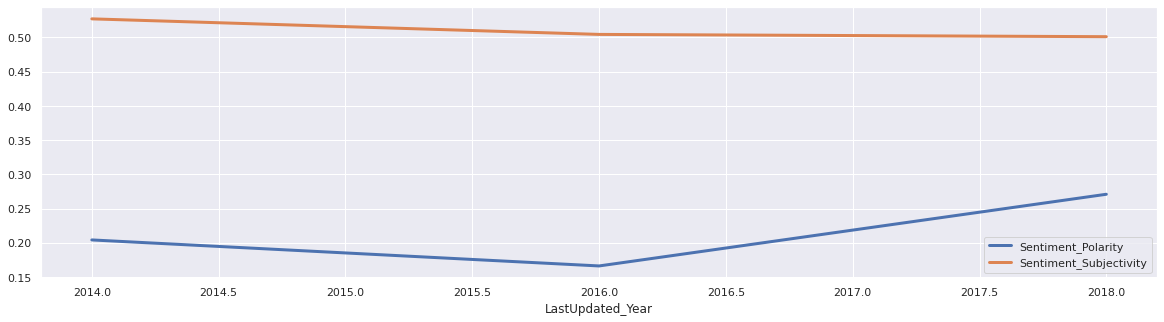

In [ ]:
chart = update_sent_paid_pivot.plot(kind='line', linewidth=3.0)

INFERENCE -

1. For Paid Apps, recent last updates are showing positive trend for sentiment polarity.

2. Sentiment Subjectivity looks stable 

In [ ]:
update_sent_free_pivot = pd.pivot_table(free_app_sent_df, values=['Sentiment_Polarity','Sentiment_Subjectivity'], index='LastUpdated_Year',aggfunc='mean')
update_sent_free_pivot

,Sentiment_Polarity,Sentiment_Subjectivity
LastUpdated_Year,,
2011,0.193917,0.488203
2012,0.065829,0.672514
2013,0.261014,0.530911
2014,0.267090,0.522814
2015,0.139374,0.496997
2016,0.133439,0.476599
2017,0.193191,0.495334
2018,0.181098,0.493460


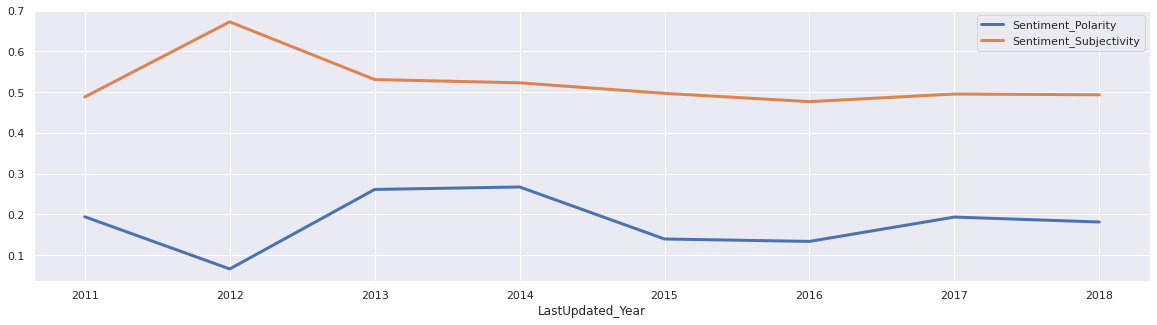

In [ ]:
chart = update_sent_free_pivot.plot(kind='line', linewidth=3.0)

INFERENCE -

1. For Free Apps, recent last updates are notshowing significant positive trend for both sentiment polarity as well as Sentiment Subjectivity

2. Polarity & Subjectivity both looks stable 

# **SENTIMENT POLARITY AND SUBJECTIVITY TREND**

-----

In [ ]:
free_pol_sub_trend_pivot= pd.pivot_table(free_app_sent_df, values='Sentiment_Subjectivity', index='Sentiment_Polarity', columns='Type',aggfunc='mean')

free_pol_sub_trend_pivot.sort_values(by=['Free'], ascending=False).reset_index().head(100)

Type,Sentiment_Polarity,Free
0,0.737500,1.000000
1,-0.520833,1.000000
2,0.195312,1.000000
3,-0.812500,1.000000
4,-0.787500,1.000000
...,...,...
95,-0.805176,0.843750
96,-0.656250,0.843750
97,0.670000,0.843333
98,0.374444,0.841667


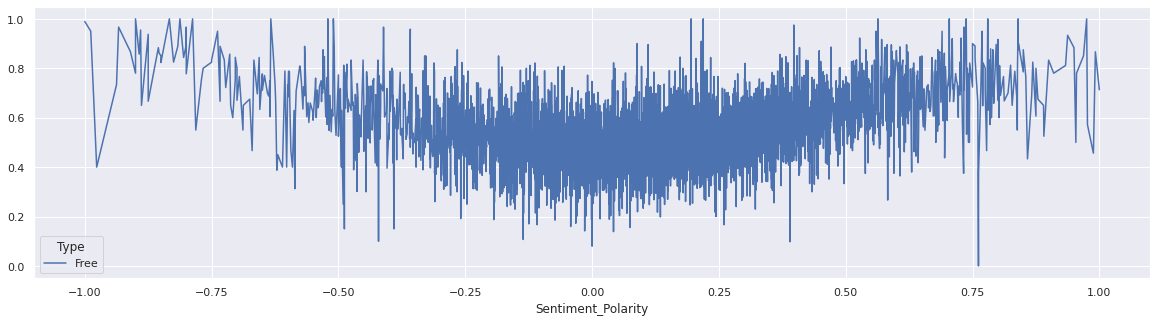

In [ ]:
# Lets understand the trend with hep of visualization
free_pol_sub_trend_pivot.plot.line()

INFERENCE -

1. Here we can see that, as polarity is going towards two extreams sentiment subjectivity is increasing.

2. People having their views very intense and emotional for highly negative or highly positive reviews

3. Polarity is moving towards high subjectivity to positive as well as negative end.

# **Identify Successful Apps - In Terms of Sentiments**

-----

Let's Find Successfull Apps - In terms of Reviews & Sentiments

In terms of Reviews and Sentiments, success of the Apps can be defined on below two parameters,
1. Sentiment Polarity (Positive - Inclination towards positive sentiments about overall App)
2. Sentiment Subjectivity (Intensity of positive / negative emotions about overall App experience)
3. No of Installations of App

Not considering No of Reviews as 'No of Reviews & Installations' are positively correlated with each other and installations are primary measures of success of any App. Hence considering above three parameters here.

In [ ]:
free_app_sent_df.describe()

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Sentiment_Polarity,Sentiment_Subjectivity
count,35513.000000,3.551300e+04,35513.000000,3.551300e+04,35513.0,35513.000000,35513.000000,35513.000000,35513.000000,35513.000000
mean,4.296970,1.429683e+06,24242.919072,4.426716e+07,0.0,15.359108,6.737871,2017.744910,0.180346,0.493562
std,0.303954,5.763204e+06,23620.365361,1.461184e+08,0.0,10.237778,1.771267,0.754317,0.350856,0.258510
min,2.600000,4.600000e+01,8.000000,1.000000e+04,0.0,1.000000,1.000000,2011.000000,-1.000000,0.000000
25%,4.100000,1.065700e+04,12288.000000,1.000000e+06,0.0,5.000000,6.000000,2018.000000,0.000000,0.360000
50%,4.300000,6.451300e+04,12288.000000,5.000000e+06,0.0,16.000000,7.000000,2018.000000,0.150000,0.514835
75%,4.500000,5.369260e+05,28672.000000,1.000000e+07,0.0,25.000000,8.000000,2018.000000,0.400000,0.650000
max,4.900000,7.812821e+07,101376.000000,1.000000e+09,0.0,31.000000,12.000000,2018.000000,1.000000,1.000000


In [ ]:
# Lets create a dataframe of Apps having above average performance.
# As per above Stats,

# Criteria for "Above Avg Success" is Apps meeting below Avg parameter criteria,

# Avg Rating = 4.296970
# Avg Installs = 4.426716e+07
# Avg Reviews = 1.429683e+06
# Avg Sentiment polarity = 0.180346
# Avg Sentiment subjectivity = 0.493562

In [ ]:
# Above avg Free APPs

abv_avg_free_app_sent_df = merg_sent_df[(merg_sent_df['Installs'] >4.426716e+07) & (merg_sent_df['Rating'] >4.296970) & (merg_sent_df['Reviews'] >1.429683e+06) & (merg_sent_df['Sentiment_Polarity'] >0.180346) & (merg_sent_df['Sentiment_Subjectivity'] >0.493562)]
abv_avg_free_app_sent_df.shape

(1367, 20)

In [ ]:
paid_app_sent_df.describe()

,Rating,Reviews,Size,Installs,Price,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Sentiment_Polarity,Sentiment_Subjectivity
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,4.322115,16230.829327,21496.557692,197774.038462,9.431106,12.375000,8.459135,2016.197115,0.228548,0.511253
std,0.183254,29709.563453,12386.926279,356125.105808,7.664078,5.601097,2.151662,1.812830,0.272047,0.214974
min,4.100000,395.000000,6041.000000,1000.000000,0.990000,7.000000,6.000000,2014.000000,-0.500000,0.000000
25%,4.100000,881.000000,9728.000000,10000.000000,3.990000,7.000000,7.000000,2014.000000,0.024219,0.412819
50%,4.300000,3387.000000,19456.000000,50000.000000,9.990000,9.000000,8.000000,2016.000000,0.231521,0.514286
75%,4.500000,18125.000000,26624.000000,100000.000000,11.990000,16.000000,12.000000,2018.000000,0.416667,0.642857
max,4.600000,97890.000000,47104.000000,1000000.000000,29.990000,24.000000,12.000000,2018.000000,1.000000,1.000000


In [ ]:
# Lets create a dataframe of Apps having above average performance.
# As per above Stats,

# Criteria for "Above Avg Success" is Apps meeting below Avg parameter criteria,

# Avg Rating = 4.322115
# Avg Installs = 197774.038462
# Avg Reviews = 16230.829327
# Avg Sentiment polarity = 0.228548
# Avg Sentiment subjectivity = 0.511253

In [ ]:
# Above avg Paid APPs

abv_avg_paid_app_sent_df = merg_sent_df[(merg_sent_df['Installs'] >197774.038462) & (merg_sent_df['Rating'] >4.322115) & (merg_sent_df['Reviews'] >16230.829327) & (merg_sent_df['Sentiment_Polarity'] >0.228548) & (merg_sent_df['Sentiment_Subjectivity'] >0.511253)]
abv_avg_paid_app_sent_df.shape

(3805, 20)

## Top 10 Successful Genres having Strong Positive Sentiments
**(with high rating and installation)**

# FREE APPS

In [ ]:
top_positive_genres_df = abv_avg_free_app_sent_df.groupby("Genres")['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'].mean().sort_values(by = ['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'], axis=0, ascending=[False, False, False, False, False], inplace=False).head(10)
top_positive_genres_df1 = top_positive_genres_df.iloc[0:,:0]
top_positive_genres_df1

""
Genres
Communication
Photography
Tools
Casual
Productivity
Social
Education;Education
Books & Reference
Strategy


### Identify Top Performing - Positive Categories

In [ ]:
# Merging Top10 genres dataframe with base dataframe (abv_avg_free_app_data_df) to filter App data belongs to these Top10 Genres.

merge_top_positive_genres_df = pd.merge(abv_avg_free_app_sent_df, top_positive_genres_df1, how='inner', left_on='Genres', right_on='Genres')
merge_top_positive_genres_df.shape

(746, 20)

In [ ]:
top_positive_cat_df = merge_top_positive_genres_df.groupby("Category")['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'].mean().sort_values(by = ['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'], axis=0, ascending=[False, False, False, False, False], inplace=False).head(10)
top_positive_cat_df1 = top_positive_cat_df.iloc[0:,:0]
top_positive_cat_df1

""
Category
COMMUNICATION
PHOTOGRAPHY
TOOLS
FAMILY
PRODUCTIVITY
SOCIAL
BOOKS_AND_REFERENCE
TRAVEL_AND_LOCAL
GAME


### Identify Top Performing - Positive Apps

In [ ]:
# Merging Top10 genres dataframe with base dataframe (abv_avg_free_app_data_df) to filter App data belongs to these Top10 Genres.

merge_top_positive_cat_df = pd.merge(merge_top_positive_genres_df, top_positive_cat_df1, how='inner', left_on='Category', right_on='Category')
merge_top_positive_cat_df.shape

(746, 20)

In [ ]:
top_positive_app_df = merge_top_positive_cat_df.groupby("App")['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'].mean().sort_values(by = ['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'], axis=0, ascending=[False, False, False, False, False], inplace=False).head(10)
top_positive_app_df1 = top_positive_app_df.iloc[0:,:0]
top_positive_app_df1

""
App
Google Photos
Google
Gmail
Google Duo - High Quality Video Calls
Candy Crush Saga
Google Translate
Dropbox
Facebook Lite
Duolingo: Learn Languages Free


# PAID APPS

In [ ]:
top_posi_p_gen_df = abv_avg_paid_app_sent_df.groupby("Genres")['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'].mean().sort_values(by = ['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'], axis=0, ascending=[False, False, False, False, False], inplace=False).head(10)
top_posi_p_gen_df1 = top_posi_p_gen_df.iloc[0:,:0]
top_posi_p_gen_df1

""
Genres
Photography
Casual
Education;Education
Strategy
Racing
Tools
Productivity
Communication
Weather


## Top positive paid cat

In [ ]:
# Merging Top10 genres dataframe with base dataframe (abv_avg_free_app_data_df) to filter App data belongs to these Top10 Genres.

merge_top_posi_p_gen_df = pd.merge(abv_avg_paid_app_sent_df, top_posi_p_gen_df1, how='inner', left_on='Genres', right_on='Genres')
merge_top_posi_p_gen_df.shape

(1135, 20)

In [ ]:
top_posi_p_cat_df = merge_top_posi_p_gen_df.groupby("Category")['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'].mean().sort_values(by = ['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'], axis=0, ascending=[False, False, False, False, False], inplace=False).head(10)
top_posi_p_cat_df1 = top_posi_p_cat_df.iloc[0:,:0]
top_posi_p_cat_df1

""
Category
PHOTOGRAPHY
FAMILY
TOOLS
PRODUCTIVITY
COMMUNICATION
GAME
WEATHER
BOOKS_AND_REFERENCE


## Top positive paid App

In [ ]:
# Merging Top10 genres dataframe with base dataframe (abv_avg_free_app_data_df) to filter App data belongs to these Top10 Genres.

merge_top_posi_p_cat_df = pd.merge(merge_top_posi_p_gen_df, top_posi_p_cat_df1, how='inner', left_on='Category', right_on='Category')
merge_top_posi_p_cat_df.shape

(1135, 20)

In [ ]:
top_posi_p_app_df = merge_top_posi_p_cat_df.groupby("App")['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'].mean().sort_values(by = ['Installs','Rating','Reviews','Sentiment_Polarity', 'Sentiment_Subjectivity'], axis=0, ascending=[False, False, False, False, False], inplace=False).head(10)
top_posi_p_app_df1 = top_posi_p_app_df.iloc[0:,:0]
top_posi_p_app_df1

""
App
Google Photos
Google
Google Duo - High Quality Video Calls
Candy Crush Saga
Google Translate
Dropbox
Duolingo: Learn Languages Free
Bible
Clash of Clans
